In [1]:
#import needed libraries (although not all imported below are used in the given code)

import os
from os import listdir
from os.path import isfile, join

import sys
import codecs
import fileinput
import string
from collections import OrderedDict

import numpy as np

from pandas import DataFrame
import pandas as pd

import matplotlib

%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.dates as md
from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerLine2D

#from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import optimize, stats
from scipy.integrate import quad
from scipy.signal import find_peaks, peak_widths,hilbert

from decimal import Decimal



import iminuit 


import csv
import cmath
import math
from math import sqrt




# destination to the data (input) and output folders (change according to the path on your PC)

containing_folder_path = "/home/mfedkevych/Work/LZ/"
path_base = containing_folder_path + "code_backup/Analysis/AmBe-2_withW_withAttenuator_endcap_near/"
measurement_path= path_base +'Data/'
measurement_output_path= path_base + 'Results/'

#calibration parameters
p0=0.974
p1=1.1


#function to count number of significant digits after comma
def number_sigdigs(x):
    digs_after_comma = str(x - math.floor(x))
    digs_after_comma = digs_after_comma[2:]
    number=0
    for c in digs_after_comma:
        if c=='0':
            number+=1
        else:
            number+=2
            break
    return number

print('numpy version', np.__version__)
print('matplotlib version', matplotlib.__version__)
print('pandas version', pd.__version__)
print('scipy version', scipy.__version__)
print('iminuit version', iminuit.__version__)

numpy version 1.25.1
matplotlib version 3.7.2
pandas version 2.0.3
scipy version 1.11.1
iminuit version 2.22.0


In [2]:
# read the data files from measurement_path folder and replace "," delimiter with "."

files_in_folder = [f for f in listdir (measurement_path) if isfile(join(measurement_path, f))]
files_in_folder.sort()

for f in files_in_folder:
    
    name = 0

    # Read in the file
    with open(measurement_path+f, 'r') as input_file :
        filedata = input_file.read()

         # Replace the target string
        filedata = filedata.replace(",", ".")

    # Write the file out again
    with open(measurement_path+f, 'w') as input_file:
        input_file.write(filedata)
    input_file.close()

In [3]:
# read the data files and put the content into list of dataframes

numbers=np.linspace(0,8191,num=8192)
numbers=list(numbers)

import re

scan = [] #list of measurement data (in DataFrame format) extracted from scan files
files_scan=[] #list of measurement files

for f in files_in_folder:
    if "AmBe-2" in f: #choose only files with names containing "AmBe-1"
        
        print(f) #prints scan file name
        files_scan.append(f) 
        


        scan_temp = pd.read_csv(measurement_path + f, #read file content in DataFrame format
            skiprows=(0,1), 
            header=None,
            delimiter="\t",
            )
        print(scan_temp) #prints measurement file data in DataFrame format
        
        scan.append(scan_temp) # add the dataframe to the list

for f in files_in_folder:
    if "Background" in f: #choose only files with names containing "Background"
        
        print(f) #prints scan file name
        files_scan.append(f) 


        scan_temp = pd.read_csv(measurement_path + f, #read file content in DataFrame format
            skiprows=(0,1), 
            header=None,
            delimiter="\t",
            )
        print(scan_temp) #prints measurement file data in DataFrame format
        
        scan.append(scan_temp) # add the dataframe to the list

        
        

#combine background data
bkg = scan[1][1]

#AmBe measurement time and background measurement time
t=20271
t_bkg=64517.94


AmBe-2_on_endcap_to_endcap_in_capsule.dat
         0  1
0        0  0
1        1  0
2        2  0
3        3  0
4        4  0
...    ... ..
8187  8187  0
8188  8188  0
8189  8189  0
8190  8190  0
8191  8191  0

[8192 rows x 2 columns]
20221108_Background.dat
         0  1
0        0  0
1        1  0
2        2  0
3        3  0
4        4  0
...    ... ..
8187  8187  0
8188  8188  0
8189  8189  0
8190  8190  0
8191  8191  0

[8192 rows x 2 columns]


In [4]:
#checking that the scan files have been read and written in the right order

i=0
while i<len(files_scan):
    print(i, files_scan[i])
    i+=1


0 AmBe-2_on_endcap_to_endcap_in_capsule.dat
1 20221108_Background.dat


<Figure size 1700x1400 with 0 Axes>

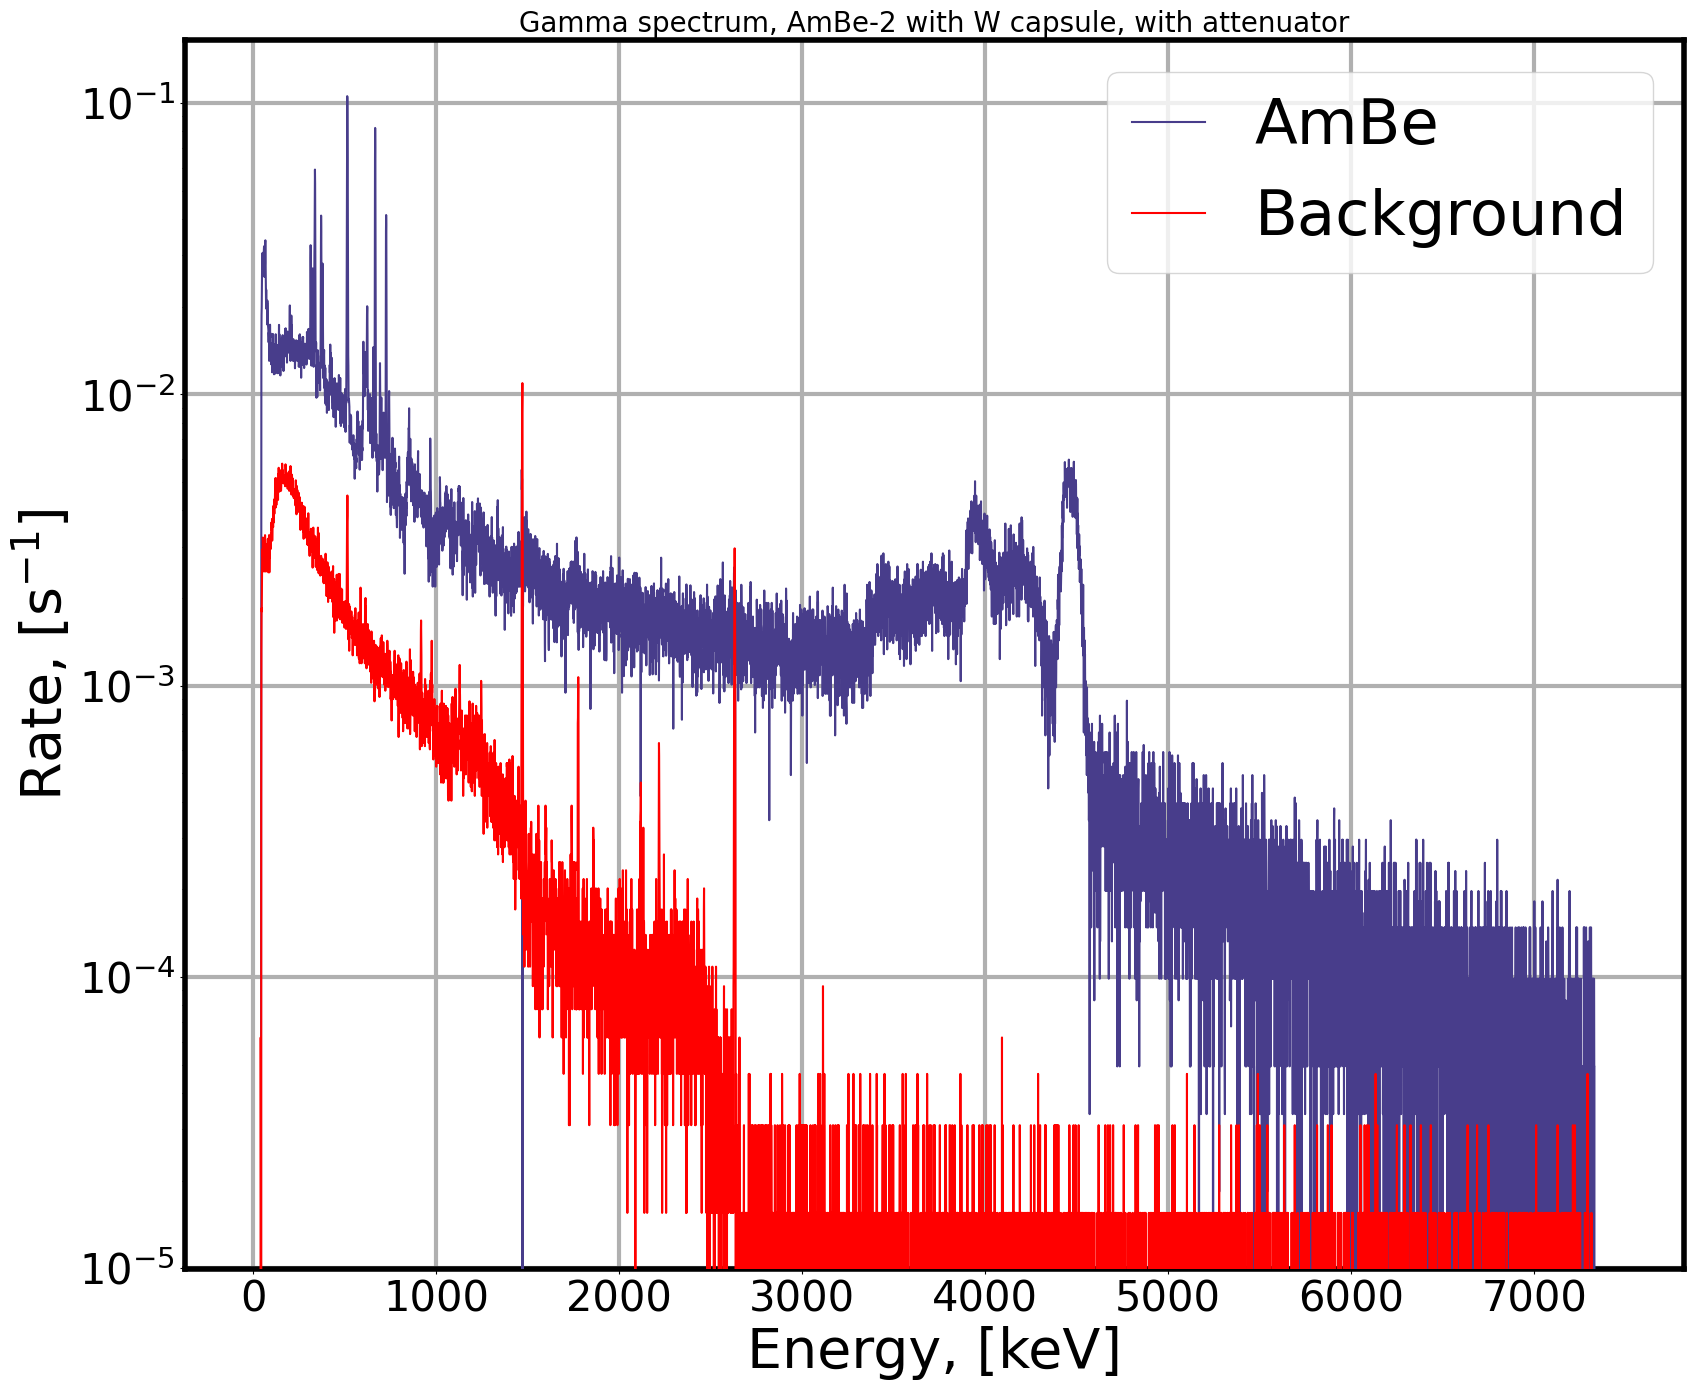

In [5]:
#define variables for the order of plotting
analysis_extra_kwargs = {"zorder":200}
analysis_kwargs = {"zorder":100}
level_kwargs = {"zorder":80}
data_kwargs = {"zorder":50}
error_kwargs = {"zorder":25}
grid_kwargs = {"zorder":0}

#plotting parameters
label_size = 14
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size
plt.rcParams['figure.figsize'] = (17.0, 14.0)
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['grid.linewidth'] = 3
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1

plt.rcParams['legend.handlelength'] = 1.17
plt.rcParams['legend.handleheight'] = 0.65



plt.figure()
fig, ax1 = plt.subplots()

plt.title('Gamma spectrum, AmBe-2 with W capsule, with attenuator', fontsize=20)

#label the axes
ax1.set_xlabel( "Energy, [keV]", fontsize=40)
ax1.set_ylabel( u"Rate, [s$^{-1}$]", fontsize=40)

#set axes tick parameters
for tl in ax1.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)

for tl in ax1.get_yticklabels():
    tl.set_color('black')
    tl.set_size(30)








Data = ax1.plot((np.asarray(scan[0][0]-p0))/p1, np.asarray(scan[0][1])/t - (np.asarray(bkg))/t_bkg, 
                          color="darkslateblue", label="AmBe",  **error_kwargs)
Bkg = ax1.plot((np.asarray(scan[0][0]-p0))/p1, (np.asarray(bkg))/t_bkg, 
                          color="red", label="Background",  **error_kwargs)
#Data = ax1.scatter(np.asarray(scan[0][0]), np.asarray(scan[0][1]), edgecolors='black', 
 #                            marker="o", color="paleturquoise", s=100, **error_kwargs)


fig.tight_layout()

ax1.set_yscale('log')

#ax1.set_ylim(-0.001,0.05)


ax1.grid() # add grid to the plot

plt.legend(prop={'size': 45})

#save and show the plot
plt.savefig(measurement_output_path+"Gamma_spectrum_vs_bkg_AmBe-2_noW_noAt_Energy_logY.png", bbox_inches ='tight')
plt.show()
#make arrays to store activity, activity error and peak position data


In [6]:
#make arrays to store activity, activity error and peak position data

activity_mean=[]
activity_err_mean=[]
peak_energy=[]

<ValueView A=5483.574358840169 sig=1.39027564249046 mu=734.0946377874554 offset=125.92627034050233>
<ErrorView A=83.9246703218339 sig=0.01930231739026237 mu=0.02233298914296652 offset=2.820417091366314>
(5483.574358840169, 1.39027564249046, 734.0946377874554, 125.92627034050233)
20271.000000000004


/tmp/ipykernel_76736/1434740633.py:284: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


<Figure size 1700x1400 with 0 Axes>

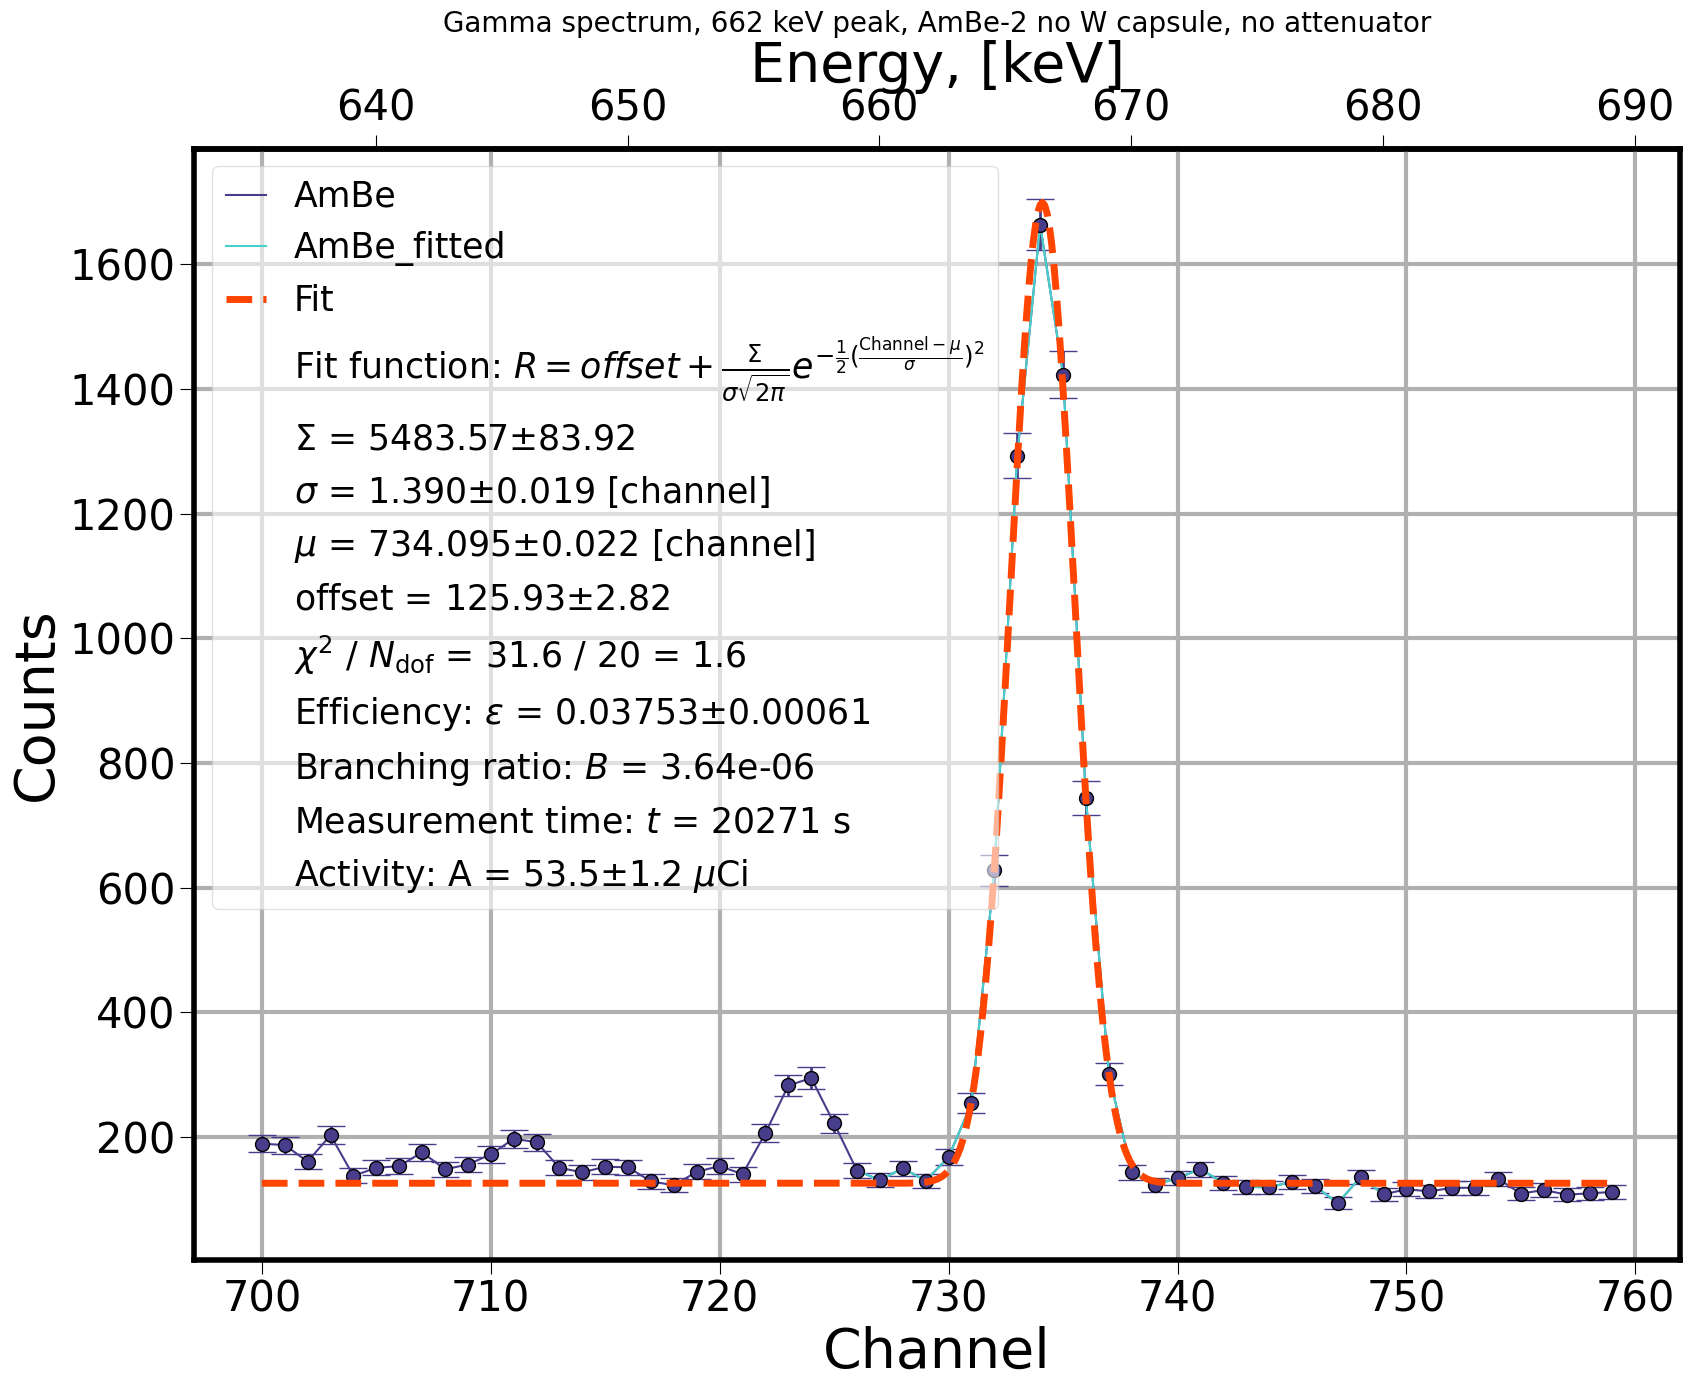

In [7]:
#define variables for the order of plotting
analysis_extra_kwargs = {"zorder":200}
analysis_kwargs = {"zorder":100}
level_kwargs = {"zorder":80}
data_kwargs = {"zorder":50}
error_kwargs = {"zorder":25}
grid_kwargs = {"zorder":0}

#plotting parameters
label_size = 14
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size
plt.rcParams['figure.figsize'] = (17.0, 14.0)
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['grid.linewidth'] = 3
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1

plt.rcParams['legend.handlelength'] = 1.17
plt.rcParams['legend.handleheight'] = 0.65


#define fit function for average pulse
from scipy.integrate import quad
from decimal import Decimal

from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerLine2D

import iminuit


import scipy
from scipy.signal import find_peaks, peak_widths,hilbert
    
# allow complete fit output information  to be displayed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares


# Define function and its inverse
f = lambda x: (x-p0)/p1
g = lambda x: p1*x+p0

plt.figure()
fig, ax1 = plt.subplots()

plt.title('Gamma spectrum, 662 keV peak, AmBe-2 no W capsule, no attenuator', fontsize=20)

ax2 = ax1.secondary_xaxis("top", functions=(f,g))



#label the axes
ax1.set_xlabel( "Channel", fontsize=40)
ax2.set_xlabel( "Energy, [keV]", fontsize=40)
ax1.set_ylabel( u"Counts", fontsize=40)

#set axes tick parameters
for tl in ax1.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)
    
for tl in ax2.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)

for tl in ax1.get_yticklabels():
    tl.set_color('black')
    tl.set_size(30)

ax1.tick_params(length=10)
ax2.tick_params(length=10)

fig.tight_layout()









channels=np.asarray(scan[0][0][700:760])
counts_no_bkg=np.asarray(scan[0][1])[700:760]-np.asarray(bkg[700:760])/t_bkg*t
counts_no_bkg_err=np.sqrt(np.asarray(scan[0][1])[700:760]-np.asarray(bkg[700:760])/t_bkg*t)

channels_to_fit=np.asarray(scan[0][0][726:750])
counts_no_bkg_to_fit=np.asarray(scan[0][1])[726:750]-np.asarray(bkg[726:750])/t_bkg*t
counts_no_bkg_err_to_fit=np.sqrt(np.asarray(scan[0][1])[726:750]-np.asarray(bkg[726:750])/t_bkg*t)



handlelist=[]
labellist=[]


Data, = ax1.plot(channels, counts_no_bkg, 
                          color="darkslateblue", label="AmBe",  **error_kwargs)

data_err = plt.errorbar(channels, counts_no_bkg, yerr=np.array(counts_no_bkg_err), fmt='o', mec='black', 
                            mew=1, color = 'darkslateblue', markersize=1, elinewidth=2, capthick=10, capsize=10, **error_kwargs)

data = ax1.scatter(channels, counts_no_bkg, label=r'Data', edgecolors='black', 
                              marker="o", color="darkslateblue", s=100, **analysis_kwargs)


handlelist.append(Data)
labellist.append(Data.get_label())







#define fit function
def normal_distribution(x, A, sig, mu, offset):
    return offset+A/np.sqrt(2*math.pi)/sig * np.exp(-1/2*((x-mu)/sig)**2)





#perform a least squares fit with iminuit
least_squares = LeastSquares(channels_to_fit, counts_no_bkg_to_fit, counts_no_bkg_err_to_fit,normal_distribution)





#set initial parameter values
A00 = 5000
mu00 = 735
sig00 = 1 
offset00 = 160

#assemble list fit arguments for the minimizer
namelist = ['A', 'sig', 'mu','offset']
kwargs = dict(A=A00, sig=sig00, mu=mu00, offset=offset00)


#create iminuit minimizer
minuit = iminuit.Minuit(least_squares, **kwargs, name=namelist ) 
    
#minuit.fixed["offset"] = True
    
#set parameter limits
#minuit.limits["bkg"] = (-2e-2,0)



#run minimization  
minuit.migrad()
#minuit.minos()# run uncertainty estimator
#minuit.hesse()# run uncertainty estimator

#print fit results
print(minuit.values)
print(minuit.errors)
# see iminuit tutorial on how to give initial value/range/error

#create tuple of fit parameter result values, to pass to the fit function
argtuple=tuple(minuit.values)
#argtuple=tuple(minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset'])

print(argtuple)



#plot the fit curve
fit=[]
ch = []
chmin=channels[0]
chmax=channels[len(channels)-1]
k=chmin
k_end=chmax

while k<=k_end:
    ch.append(k)
    fit.append(normal_distribution(k, minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset']))
    k+=0.1

Data_fit, = ax1.plot(channels_to_fit, counts_no_bkg_to_fit, 
                          color="mediumturquoise", label="AmBe_fitted",  **error_kwargs)

handlelist.append(Data_fit)
labellist.append(Data_fit.get_label())

Fit, = plt.plot(np.asarray(ch), np.asarray(fit), c='orangered', 
                           linewidth=5, linestyle='dashed', label = 'Fit', **analysis_extra_kwargs)


handlelist.append(Fit)
labellist.append(Fit.get_label())
    
text10= 'Fit function: ' + r'$I_{\mathrm{FC}}(B) = bkg + \sum _{i}\frac{A_i}{\sigma _i \sqrt{2 \pi} } e^{-\frac{1}{2} (\frac{B-B^\mathrm{central}_i}{\sigma _i})^2}$'


text_chi_1 = f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {len(counts_no_bkg) - minuit.nfit} = {minuit.fval / (len(counts_no_bkg) - minuit.nfit) :.1f}"


extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    





#short legend
leg = plt.legend(handles=[Data, Fit, extra, extra], 
                 labels = [Data.get_label(), Fit.get_label(), text10, text_chi_1],
                 prop={'size': 25}, loc = 'upper left', fancybox=True, framealpha=0.6)
leg.set_zorder(300)





extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)

text=[r'Fit function: ' + r'$R = offset + \frac{\Sigma}{\sigma \sqrt{2 \pi} } e^{-\frac{1}{2} (\frac{\mathrm{Channel}-\mu}{\sigma })^2}$',
      r'$\Sigma$'+' = {}$\pm${}'.format(round(Decimal(minuit.values['A']),number_sigdigs(minuit.errors['A'])), 
                                        round(Decimal(minuit.errors['A']),number_sigdigs(minuit.errors['A']))),
      r'$\sigma$'+' = {}$\pm${} [channel]'.format(round(Decimal(minuit.values['sig']),number_sigdigs(minuit.errors['sig'])), 
                                        round(Decimal(minuit.errors['sig']),number_sigdigs(minuit.errors['sig']))),
      r'$\mu$'+' = {}$\pm${} [channel]'.format(round(Decimal(minuit.values['mu']),number_sigdigs(minuit.errors['mu'])), 
                                        round(Decimal(minuit.errors['mu']),number_sigdigs(minuit.errors['mu']))),
      r'offset'+' = {}$\pm${}'.format(round(Decimal(minuit.values['offset']),number_sigdigs(minuit.errors['offset'])), 
                                        round(Decimal(minuit.errors['offset']),number_sigdigs(minuit.errors['offset']))),
      f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {len(counts_no_bkg_to_fit) - minuit.nfit} = {minuit.fval / (len(counts_no_bkg_to_fit) - minuit.nfit) :.1f}"

     ]



for string in text:
    handlelist.append(extra)
    labellist.append(string)




import scipy.integrate as integrate

B=3.64e-6
efficiency=0.03753 #corrected for sigma
efficiency_err=0.00061 #corrected for sigm


area = integrate.quad(lambda x: normal_distribution(x, minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset']), 100, 250)




handlelist.append(extra)
labellist.append("Efficiency: $\epsilon$ = {}$\pm${}".format(round(Decimal(efficiency),5), 
                                        round(Decimal(efficiency_err),5)))

handlelist.append(extra)
labellist.append("Branching ratio: $B$ = {}".format(B))
                 
handlelist.append(extra)
labellist.append("Measurement time: $t$ = {} s".format(t))



activity=minuit.values['A']/efficiency/B/t/3.7e10*1e6
activity_err=np.sqrt((minuit.errors['A']/efficiency/t/B/3.7e10*1e6)**2+(minuit.values['A']*efficiency_err/efficiency**2/t/B/3.7e10*1e6)**2)
handlelist.append(extra)
labellist.append("Activity: A = {}$\pm${} $\mu$Ci".format(round(Decimal(activity),1), 
                                        round(Decimal(activity_err),1)))


time_check=minuit.values['A']/efficiency/B/activity/3.7e10*1e6
print(time_check)

fig.tight_layout()



ax1.grid() # add grid to the plot

#short legend
leg = plt.legend(handles=handlelist, 
                 labels = labellist,
                 prop={'size': 25}, loc = 'upper left', fancybox=True, framealpha=0.6)
leg.set_zorder(300)
#save and show the plot
plt.savefig(measurement_output_path+"Gamma_spectrum_vs_bkg_AmBe-2_noW_noAt_ADC-Ch_fit_662keV-photopeak_counts.png", bbox_inches ='tight')
plt.show()

activity_mean.append(activity)
activity_err_mean.append(activity_err)
peak_energy.append(662)


<Figure size 1700x1400 with 0 Axes>

Text(0.5, 1.0, 'Gamma spectrum, 722 keV peak, AmBe-2 no W capsule, no attenuator')

Text(0.5, 0, 'Channel')

Text(0.5, 0, 'Energy, [keV]')

Text(0, 0.5, 'Counts')

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 48.96 (χ²/ndof = 3.1)      │              Nfcn = 116              │
│ EDM = 0.000118 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A      │  2.89e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ sig    │   1.495   │   0.032   │            │            │         │         │       │
│ 2 │ mu     │  800.09   │   0.04    │            │            │         │         │       │
│ 3 │ offset │   114.0   │    3.2    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────┐
│        │        A      sig       mu   offset │
├────────┼─────────────────────────────────────┤
│      A │ 4.59e+03 716.6e-3  -0.0166      -85 │
│    sig │ 716.6e-3 0.000991       -0 -35.8e-3 │
│     mu │  -0.0166       -0   0.0013   0.0008 │
│ offset │      -85 -35.8e-3   0.0008     9.93 │
└────────┴─────────────────────────────────────┘

<ValueView A=2893.535886732606 sig=1.4948730882423178 mu=800.0850449275138 offset=114.02727027528302>
<ErrorView A=67.71504262407568 sig=0.031486433192953946 mu=0.036072801578511 offset=3.151262488370218>
(2893.535886732606, 1.4948730882423178, 800.0850449275138, 114.02727027528302)
20271.000000000004


/tmp/ipykernel_76736/3284346506.py:282: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


<Figure size 1700x1400 with 0 Axes>

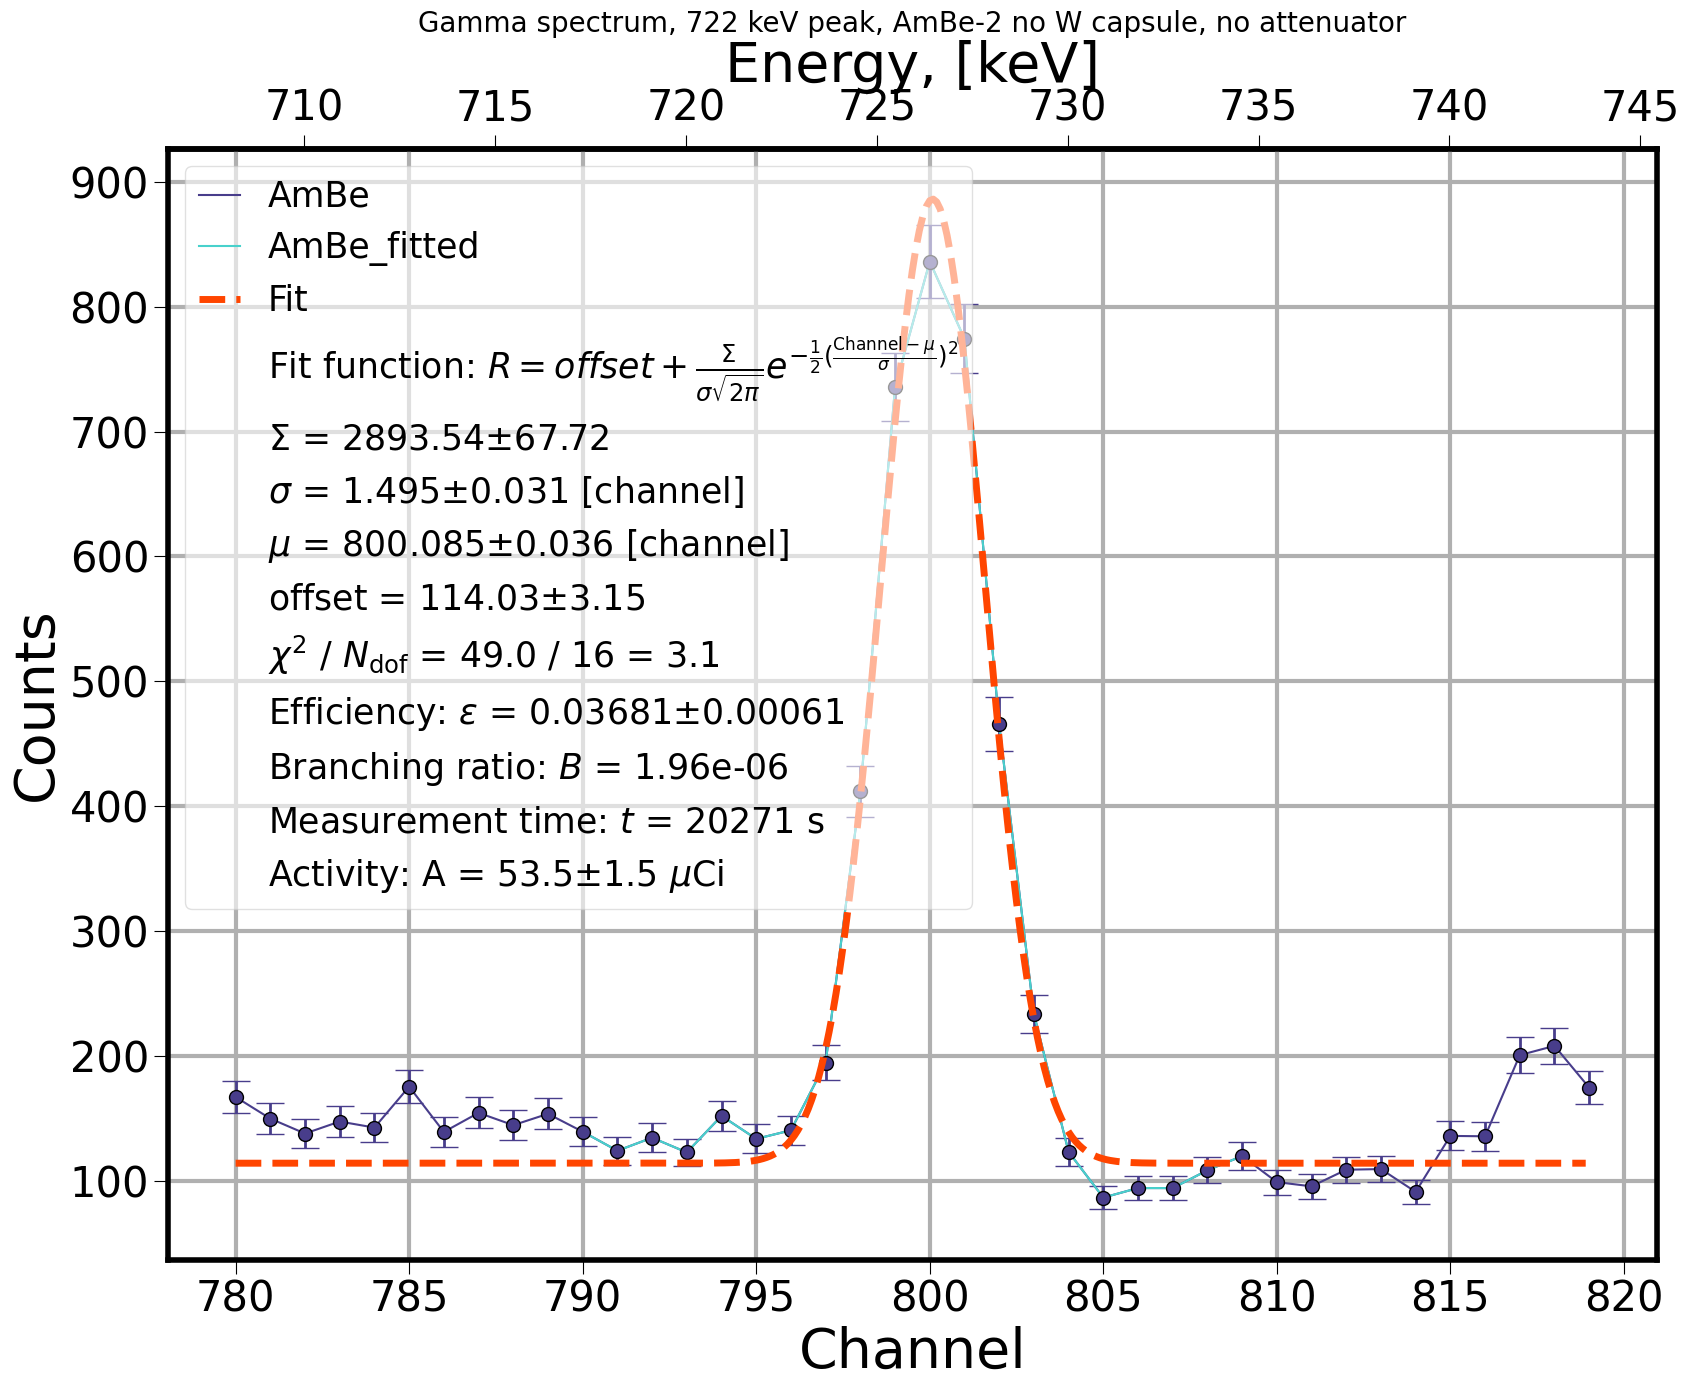

In [8]:
#define variables for the order of plotting
analysis_extra_kwargs = {"zorder":200}
analysis_kwargs = {"zorder":100}
level_kwargs = {"zorder":80}
data_kwargs = {"zorder":50}
error_kwargs = {"zorder":25}
grid_kwargs = {"zorder":0}

#plotting parameters
label_size = 14
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size
plt.rcParams['figure.figsize'] = (17.0, 14.0)
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['grid.linewidth'] = 3
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1

plt.rcParams['legend.handlelength'] = 1.17
plt.rcParams['legend.handleheight'] = 0.65


#define fit function for average pulse
from scipy.integrate import quad
from decimal import Decimal

from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerLine2D

import iminuit


import scipy
from scipy.signal import find_peaks, peak_widths,hilbert
    
# allow complete fit output information  to be displayed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

# Define function and its inverse
f = lambda x: (x-p0)/p1
g = lambda x: p1*x+p0

plt.figure()
fig, ax1 = plt.subplots()

plt.title('Gamma spectrum, 722 keV peak, AmBe-2 no W capsule, no attenuator', fontsize=20)

ax2 = ax1.secondary_xaxis("top", functions=(f,g))



#label the axes
ax1.set_xlabel( "Channel", fontsize=40)
ax2.set_xlabel( "Energy, [keV]", fontsize=40)
ax1.set_ylabel( u"Counts", fontsize=40)

#set axes tick parameters
for tl in ax1.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)
    
for tl in ax2.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)

for tl in ax1.get_yticklabels():
    tl.set_color('black')
    tl.set_size(30)

ax1.tick_params(length=10)
ax2.tick_params(length=10)

fig.tight_layout()









channels=np.asarray(scan[0][0][780:820])
counts_no_bkg=np.asarray(scan[0][1])[780:820]-np.asarray(bkg[780:820])/t_bkg*t
counts_no_bkg_err=np.sqrt(np.asarray(scan[0][1])[780:820]-np.asarray(bkg[780:820])/t_bkg*t)

channels_to_fit=np.asarray(scan[0][0][790:810])
counts_no_bkg_to_fit=np.asarray(scan[0][1])[790:810]-np.asarray(bkg[790:810])/t_bkg*t
counts_no_bkg_err_to_fit=np.sqrt(np.asarray(scan[0][1])[790:810]-np.asarray(bkg[790:810])/t_bkg*t)



handlelist=[]
labellist=[]


Data, = ax1.plot(channels, counts_no_bkg, 
                          color="darkslateblue", label="AmBe",  **error_kwargs)

data_err = plt.errorbar(channels, counts_no_bkg, yerr=np.array(counts_no_bkg_err), fmt='o', mec='black', 
                            mew=1, color = 'darkslateblue', markersize=1, elinewidth=2, capthick=10, capsize=10, **error_kwargs)

data = ax1.scatter(channels, counts_no_bkg, label=r'Data', edgecolors='black', 
                              marker="o", color="darkslateblue", s=100, **analysis_kwargs)


handlelist.append(Data)
labellist.append(Data.get_label())







#define fit function
def normal_distribution(x, A, sig, mu, offset):
    return offset+A/np.sqrt(2*math.pi)/sig * np.exp(-1/2*((x-mu)/sig)**2)





#perform a least squares fit with iminuit
least_squares = LeastSquares(channels_to_fit, counts_no_bkg_to_fit, counts_no_bkg_err_to_fit,normal_distribution)





#set initial parameter values
A00 = 3000
mu00 = 800
sig00 = 5 
offset00 = 160

#assemble list fit arguments for the minimizer
namelist = ['A', 'sig', 'mu','offset']
kwargs = dict(A=A00, sig=sig00, mu=mu00, offset=offset00)


#create iminuit minimizer
minuit = iminuit.Minuit(least_squares, **kwargs, name=namelist ) 
    
#minuit.fixed["offset"] = True
    
#set parameter limits
#minuit.limits["bkg"] = (-2e-2,0)



#run minimization  
minuit.migrad()
#minuit.minos()# run uncertainty estimator
#minuit.hesse()# run uncertainty estimator

#print fit results
print(minuit.values)
print(minuit.errors)
# see iminuit tutorial on how to give initial value/range/error

#create tuple of fit parameter result values, to pass to the fit function
argtuple=tuple(minuit.values)
#argtuple=tuple(minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset'])

print(argtuple)



#plot the fit curve
fit=[]
ch = []
chmin=channels[0]
chmax=channels[len(channels)-1]
k=chmin
k_end=chmax

while k<=k_end:
    ch.append(k)
    fit.append(normal_distribution(k, minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset']))
    k+=0.1

Data_fit, = ax1.plot(channels_to_fit, counts_no_bkg_to_fit, 
                          color="mediumturquoise", label="AmBe_fitted",  **error_kwargs)

handlelist.append(Data_fit)
labellist.append(Data_fit.get_label())

Fit, = plt.plot(np.asarray(ch), np.asarray(fit), c='orangered', 
                           linewidth=5, linestyle='dashed', label = 'Fit', **analysis_extra_kwargs)


handlelist.append(Fit)
labellist.append(Fit.get_label())
    
text10= 'Fit function: ' + r'$I_{\mathrm{FC}}(B) = bkg + \sum _{i}\frac{A_i}{\sigma _i \sqrt{2 \pi} } e^{-\frac{1}{2} (\frac{B-B^\mathrm{central}_i}{\sigma _i})^2}$'


text_chi_1 = f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {len(counts_no_bkg) - minuit.nfit} = {minuit.fval / (len(counts_no_bkg) - minuit.nfit) :.1f}"


extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    





#short legend
leg = plt.legend(handles=[Data, Fit, extra, extra], 
                 labels = [Data.get_label(), Fit.get_label(), text10, text_chi_1],
                 prop={'size': 25}, loc = 'upper left', fancybox=True, framealpha=0.6)
leg.set_zorder(300)





extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)

text=[r'Fit function: ' + r'$R = offset + \frac{\Sigma}{\sigma \sqrt{2 \pi} } e^{-\frac{1}{2} (\frac{\mathrm{Channel}-\mu}{\sigma })^2}$',
      r'$\Sigma$'+' = {}$\pm${}'.format(round(Decimal(minuit.values['A']),number_sigdigs(minuit.errors['A'])), 
                                        round(Decimal(minuit.errors['A']),number_sigdigs(minuit.errors['A']))),
      r'$\sigma$'+' = {}$\pm${} [channel]'.format(round(Decimal(minuit.values['sig']),number_sigdigs(minuit.errors['sig'])), 
                                        round(Decimal(minuit.errors['sig']),number_sigdigs(minuit.errors['sig']))),
      r'$\mu$'+' = {}$\pm${} [channel]'.format(round(Decimal(minuit.values['mu']),number_sigdigs(minuit.errors['mu'])), 
                                        round(Decimal(minuit.errors['mu']),number_sigdigs(minuit.errors['mu']))),
      r'offset'+' = {}$\pm${}'.format(round(Decimal(minuit.values['offset']),number_sigdigs(minuit.errors['offset'])), 
                                        round(Decimal(minuit.errors['offset']),number_sigdigs(minuit.errors['offset']))),
      f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {len(counts_no_bkg_to_fit) - minuit.nfit} = {minuit.fval / (len(counts_no_bkg_to_fit) - minuit.nfit) :.1f}"

     ]



for string in text:
    handlelist.append(extra)
    labellist.append(string)




import scipy.integrate as integrate

B=1.96e-6
efficiency=0.03681 #corrected for sigma
efficiency_err=0.00061 #corrected for sigma


area = integrate.quad(lambda x: normal_distribution(x, minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset']), 100, 250)




handlelist.append(extra)
labellist.append("Efficiency: $\epsilon$ = {}$\pm${}".format(round(Decimal(efficiency),5), 
                                        round(Decimal(efficiency_err),5)))

handlelist.append(extra)
labellist.append("Branching ratio: $B$ = {}".format(B))
                 
handlelist.append(extra)
labellist.append("Measurement time: $t$ = {} s".format(t))


activity=minuit.values['A']/efficiency/B/t/3.7e10*1e6
activity_err=np.sqrt((minuit.errors['A']/efficiency/t/B/3.7e10*1e6)**2+(minuit.values['A']*efficiency_err/efficiency**2/t/B/3.7e10*1e6)**2)
handlelist.append(extra)
labellist.append("Activity: A = {}$\pm${} $\mu$Ci".format(round(Decimal(activity),1), 
                                        round(Decimal(activity_err),1)))


time_check=minuit.values['A']/efficiency/B/activity/3.7e10*1e6
print(time_check)

fig.tight_layout()



ax1.grid() # add grid to the plot

#short legend
leg = plt.legend(handles=handlelist, 
                 labels = labellist,
                 prop={'size': 25}, loc = 'upper left', fancybox=True, framealpha=0.6)
leg.set_zorder(300)
#save and show the plot
plt.savefig(measurement_output_path+"Gamma_spectrum_vs_bkg_AmBe-2_noW_noAt_ADC-Ch_fit_722keV-photopeak_counts.png", bbox_inches ='tight')
plt.show()

activity_mean.append(activity)
activity_err_mean.append(activity_err)
peak_energy.append(722)


<Figure size 1700x1400 with 0 Axes>

Text(0.5, 1.0, 'Gamma spectrum, 653 keV peak, AmBe-2 no W capsule, no attenuator')

Text(0.5, 0, 'Channel')

Text(0.5, 0, 'Energy, [keV]')

Text(0, 0.5, 'Counts')

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.394 (χ²/ndof = 0.9)      │              Nfcn = 126              │
│ EDM = 1.39e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A      │    460    │    50     │            │            │         │         │       │
│ 1 │ sig    │    1.1    │    0.1    │            │            │         │         │       │
│ 2 │ mu     │  723.59   │   0.10    │            │            │         │         │       │
│ 3 │ offset │    140    │     7     │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────┐
│        │        A      sig       mu   offset │
├────────┼─────────────────────────────────────┤
│      A │ 2.68e+03    3.399   -0.149     -250 │
│    sig │    3.399   0.0105   -0.001   -0.377 │
│     mu │   -0.149   -0.001  0.00985    0.016 │
│ offset │     -250   -0.377    0.016     42.9 │
└────────┴─────────────────────────────────────┘

<ValueView A=464.86295486884507 sig=1.0953028069871706 mu=723.5884745119915 offset=139.76110173482047>
<ErrorView A=51.798695957079374 sig=0.10269637627735806 mu=0.09922634311042365 offset=6.548338035696697>
(464.86295486884507, 1.0953028069871706, 723.5884745119915, 139.76110173482047)
20271.0


/tmp/ipykernel_76736/4249409213.py:285: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


<Figure size 1700x1400 with 0 Axes>

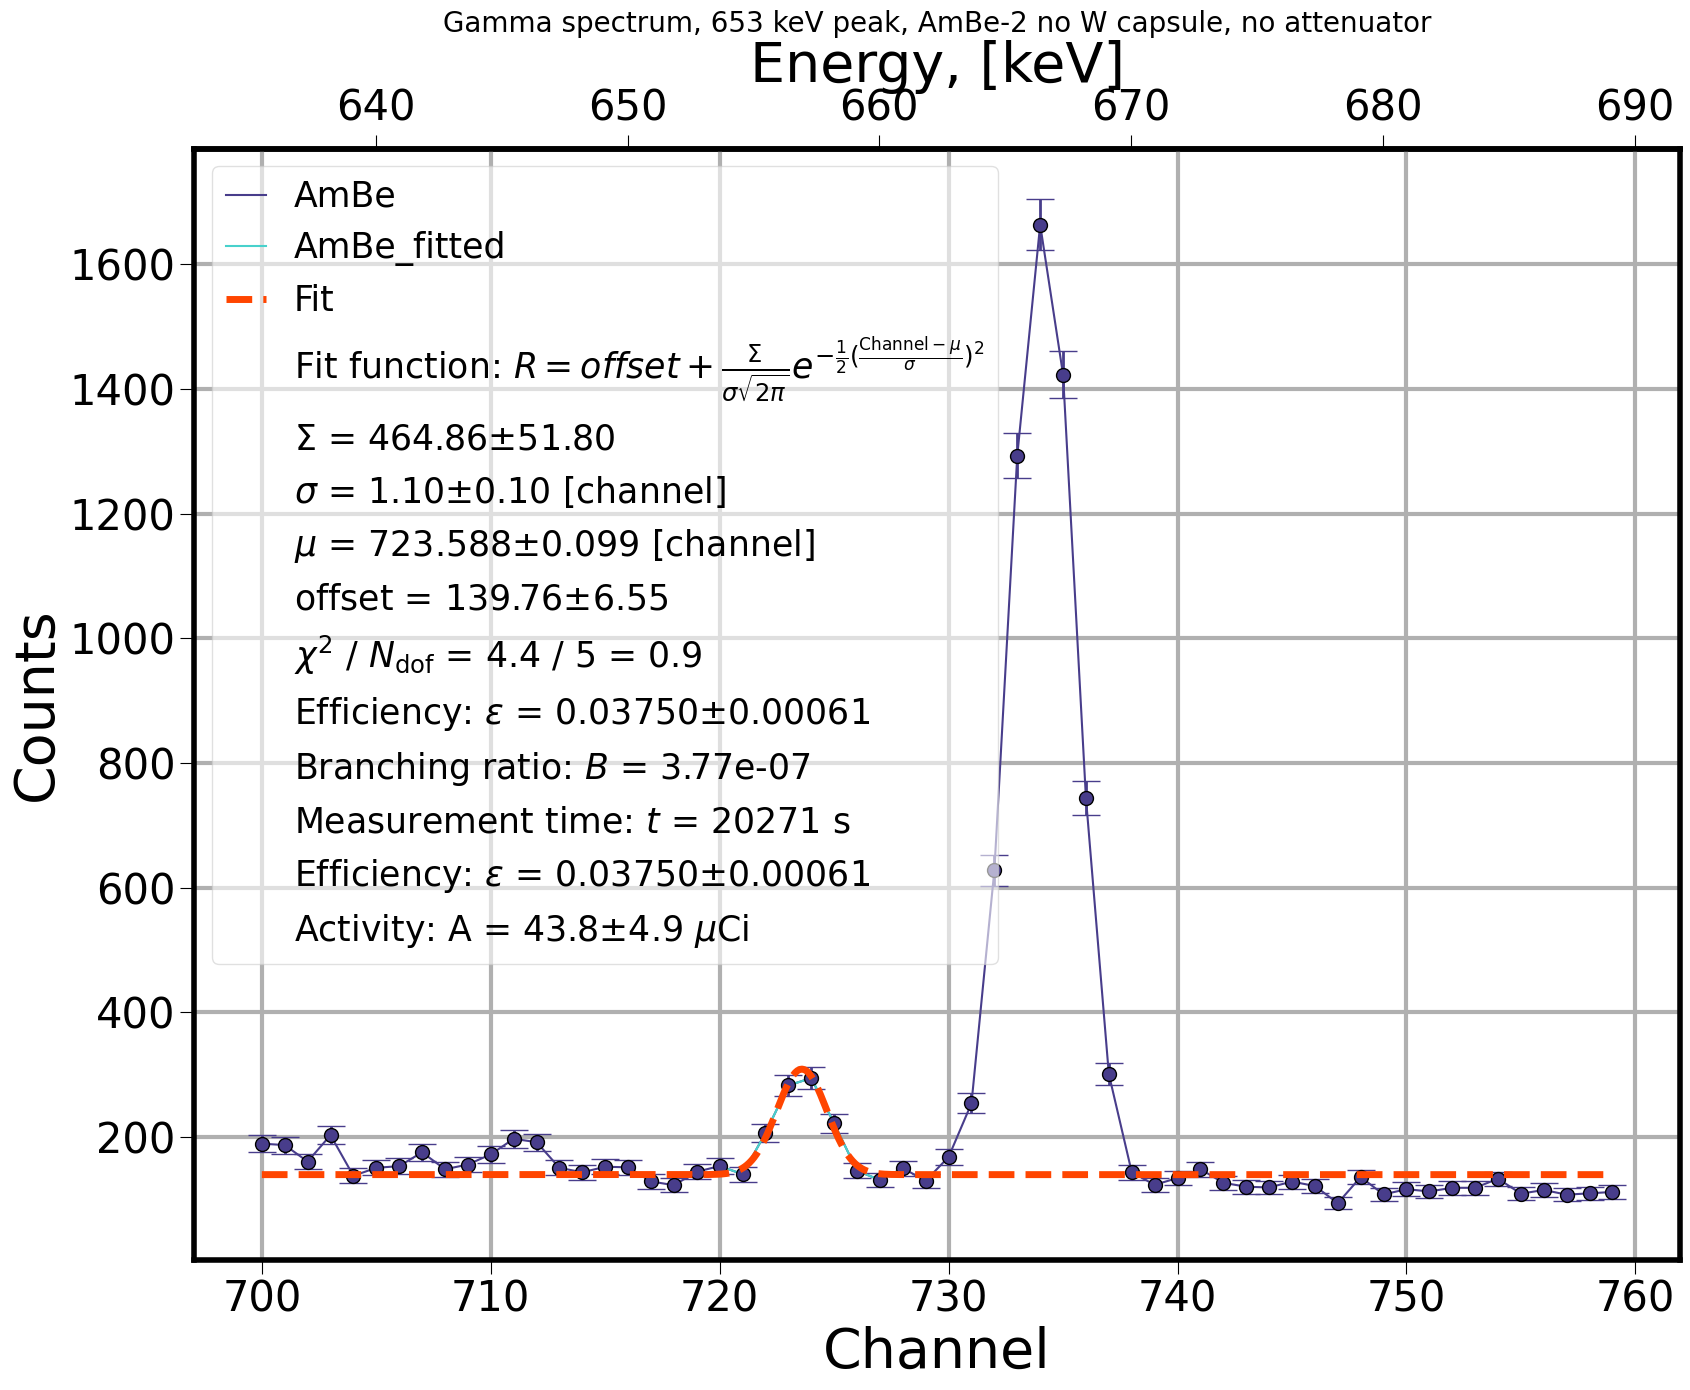

In [9]:
#define variables for the order of plotting
analysis_extra_kwargs = {"zorder":200}
analysis_kwargs = {"zorder":100}
level_kwargs = {"zorder":80}
data_kwargs = {"zorder":50}
error_kwargs = {"zorder":25}
grid_kwargs = {"zorder":0}

#plotting parameters
label_size = 14
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size
plt.rcParams['figure.figsize'] = (17.0, 14.0)
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['grid.linewidth'] = 3
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1

plt.rcParams['legend.handlelength'] = 1.17
plt.rcParams['legend.handleheight'] = 0.65


#define fit function for average pulse
from scipy.integrate import quad
from decimal import Decimal

from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerLine2D

import iminuit


import scipy
from scipy.signal import find_peaks, peak_widths,hilbert
    
# allow complete fit output information  to be displayed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

# Define function and its inverse
f = lambda x: (x-p0)/p1
g = lambda x: p1*x+p0

plt.figure()
fig, ax1 = plt.subplots()

plt.title('Gamma spectrum, 653 keV peak, AmBe-2 no W capsule, no attenuator', fontsize=20)

ax2 = ax1.secondary_xaxis("top", functions=(f,g))



#label the axes
ax1.set_xlabel( "Channel", fontsize=40)
ax2.set_xlabel( "Energy, [keV]", fontsize=40)
ax1.set_ylabel( u"Counts", fontsize=40)

#set axes tick parameters
for tl in ax1.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)
    
for tl in ax2.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)

for tl in ax1.get_yticklabels():
    tl.set_color('black')
    tl.set_size(30)

ax1.tick_params(length=10)
ax2.tick_params(length=10)

fig.tight_layout()









channels=np.asarray(scan[0][0][700:760])
counts_no_bkg=np.asarray(scan[0][1])[700:760]-np.asarray(bkg[700:760])/t_bkg*t
counts_no_bkg_err=np.sqrt(np.asarray(scan[0][1])[700:760]-np.asarray(bkg[700:760])/t_bkg*t)

channels_to_fit=np.asarray(scan[0][0][720:729])
counts_no_bkg_to_fit=np.asarray(scan[0][1])[720:729]-np.asarray(bkg[720:729])/t_bkg*t
counts_no_bkg_err_to_fit=np.sqrt(np.asarray(scan[0][1])[720:729]-np.asarray(bkg[720:729])/t_bkg*t)



handlelist=[]
labellist=[]


Data, = ax1.plot(channels, counts_no_bkg, 
                          color="darkslateblue", label="AmBe",  **error_kwargs)

data_err = plt.errorbar(channels, counts_no_bkg, yerr=np.array(counts_no_bkg_err), fmt='o', mec='black', 
                            mew=1, color = 'darkslateblue', markersize=1, elinewidth=2, capthick=10, capsize=10, **error_kwargs)

data = ax1.scatter(channels, counts_no_bkg, label=r'Data', edgecolors='black', 
                              marker="o", color="darkslateblue", s=100, **analysis_kwargs)


handlelist.append(Data)
labellist.append(Data.get_label())







#define fit function
def normal_distribution(x, A, sig, mu, offset):
    return offset+A/np.sqrt(2*math.pi)/sig * np.exp(-1/2*((x-mu)/sig)**2)





#perform a least squares fit with iminuit
least_squares = LeastSquares(channels_to_fit, counts_no_bkg_to_fit, counts_no_bkg_err_to_fit,normal_distribution)





#set initial parameter values
A00 = 1500
mu00 = 723
sig00 = 1 
offset00 = 160

#assemble list fit arguments for the minimizer
namelist = ['A', 'sig', 'mu','offset']
kwargs = dict(A=A00, sig=sig00, mu=mu00, offset=offset00)


#create iminuit minimizer
minuit = iminuit.Minuit(least_squares, **kwargs, name=namelist ) 
    
#minuit.fixed["offset"] = True
    
#set parameter limits
#minuit.limits["bkg"] = (-2e-2,0)



#run minimization  
minuit.migrad()
#minuit.minos()# run uncertainty estimator
#minuit.hesse()# run uncertainty estimator

#print fit results
print(minuit.values)
print(minuit.errors)
# see iminuit tutorial on how to give initial value/range/error

#create tuple of fit parameter result values, to pass to the fit function
argtuple=tuple(minuit.values)
#argtuple=tuple(minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset'])

print(argtuple)



#plot the fit curve
fit=[]
ch = []
chmin=channels[0]
chmax=channels[len(channels)-1]
k=chmin
k_end=chmax

while k<=k_end:
    ch.append(k)
    fit.append(normal_distribution(k, minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset']))
    k+=0.1

Data_fit, = ax1.plot(channels_to_fit, counts_no_bkg_to_fit, 
                          color="mediumturquoise", label="AmBe_fitted",  **error_kwargs)

handlelist.append(Data_fit)
labellist.append(Data_fit.get_label())

Fit, = plt.plot(np.asarray(ch), np.asarray(fit), c='orangered', 
                           linewidth=5, linestyle='dashed', label = 'Fit', **analysis_extra_kwargs)


handlelist.append(Fit)
labellist.append(Fit.get_label())
    
text10= 'Fit function: ' + r'$I_{\mathrm{FC}}(B) = bkg + \sum _{i}\frac{A_i}{\sigma _i \sqrt{2 \pi} } e^{-\frac{1}{2} (\frac{B-B^\mathrm{central}_i}{\sigma _i})^2}$'


text_chi_1 = f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {len(counts_no_bkg) - minuit.nfit} = {minuit.fval / (len(counts_no_bkg) - minuit.nfit) :.1f}"


extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    





#short legend
leg = plt.legend(handles=[Data, Fit, extra, extra], 
                 labels = [Data.get_label(), Fit.get_label(), text10, text_chi_1],
                 prop={'size': 25}, loc = 'upper left', fancybox=True, framealpha=0.6)
leg.set_zorder(300)





extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)

text=[r'Fit function: ' + r'$R = offset + \frac{\Sigma}{\sigma \sqrt{2 \pi} } e^{-\frac{1}{2} (\frac{\mathrm{Channel}-\mu}{\sigma })^2}$',
      r'$\Sigma$'+' = {}$\pm${}'.format(round(Decimal(minuit.values['A']),number_sigdigs(minuit.errors['A'])), 
                                        round(Decimal(minuit.errors['A']),number_sigdigs(minuit.errors['A']))),
      r'$\sigma$'+' = {}$\pm${} [channel]'.format(round(Decimal(minuit.values['sig']),number_sigdigs(minuit.errors['sig'])), 
                                        round(Decimal(minuit.errors['sig']),number_sigdigs(minuit.errors['sig']))),
      r'$\mu$'+' = {}$\pm${} [channel]'.format(round(Decimal(minuit.values['mu']),number_sigdigs(minuit.errors['mu'])), 
                                        round(Decimal(minuit.errors['mu']),number_sigdigs(minuit.errors['mu']))),
      r'offset'+' = {}$\pm${}'.format(round(Decimal(minuit.values['offset']),number_sigdigs(minuit.errors['offset'])), 
                                        round(Decimal(minuit.errors['offset']),number_sigdigs(minuit.errors['offset']))),
      f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {len(counts_no_bkg_to_fit) - minuit.nfit} = {minuit.fval / (len(counts_no_bkg_to_fit) - minuit.nfit) :.1f}"

     ]



for string in text:
    handlelist.append(extra)
    labellist.append(string)




import scipy.integrate as integrate

B=3.77e-7
efficiency=0.03750 #corrected for sigma
efficiency_err=0.00061 #corrected for sigma


area = integrate.quad(lambda x: normal_distribution(x, minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset']), 100, 250)




handlelist.append(extra)
labellist.append("Efficiency: $\epsilon$ = {}$\pm${}".format(round(Decimal(efficiency),5), 
                                        round(Decimal(efficiency_err),5)))

handlelist.append(extra)
labellist.append("Branching ratio: $B$ = {}".format(B))
                 
handlelist.append(extra)
labellist.append("Measurement time: $t$ = {} s".format(t))

handlelist.append(extra)
labellist.append("Efficiency: $\epsilon$ = {}$\pm${}".format(round(Decimal(efficiency),5), 
                                        round(Decimal(efficiency_err),5)))

activity=minuit.values['A']/efficiency/B/t/3.7e10*1e6
activity_err=np.sqrt((minuit.errors['A']/efficiency/t/B/3.7e10*1e6)**2+(minuit.values['A']*efficiency_err/efficiency**2/t/B/3.7e10*1e6)**2)
handlelist.append(extra)
labellist.append("Activity: A = {}$\pm${} $\mu$Ci".format(round(Decimal(activity),1), 
                                        round(Decimal(activity_err),1)))


time_check=minuit.values['A']/efficiency/B/activity/3.7e10*1e6
print(time_check)

fig.tight_layout()



ax1.grid() # add grid to the plot

#short legend
leg = plt.legend(handles=handlelist, 
                 labels = labellist,
                 prop={'size': 25}, loc = 'upper left', fancybox=True, framealpha=0.6)
leg.set_zorder(300)
#save and show the plot
plt.savefig(measurement_output_path+"Gamma_spectrum_vs_bkg_AmBe-2_noW_noAt_ADC-Ch_fit_653keV-photopeak_counts.png", bbox_inches ='tight')
plt.show()

activity_mean.append(activity)
activity_err_mean.append(activity_err)
peak_energy.append(653)


<Figure size 1700x1400 with 0 Axes>

Text(0.5, 1.0, 'Gamma spectrum, 368 keV peak, AmBe-2 no W capsule, no attenuator')

Text(0.5, 0, 'Channel')

Text(0.5, 0, 'Energy, [keV]')

Text(0, 0.5, 'Counts')

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 13.94 (χ²/ndof = 1.7)      │              Nfcn = 103              │
│ EDM = 5.26e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A      │  2.32e3   │  0.10e3   │            │            │         │         │       │
│ 1 │ sig    │   1.60    │   0.07    │            │            │         │         │       │
│ 2 │ mu     │  409.17   │   0.06    │            │            │         │         │       │
│ 3 │ offset │    232    │     7     │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────┐
│        │        A      sig       mu   offset │
├────────┼─────────────────────────────────────┤
│      A │ 9.03e+03    4.443    0.889     -380 │
│    sig │    4.443   0.0052    0.001   -0.199 │
│     mu │    0.889    0.001  0.00361    0.017 │
│ offset │     -380   -0.199    0.017     44.4 │
└────────┴─────────────────────────────────────┘

<ValueView A=2315.6773219048227 sig=1.6008477005764836 mu=409.1728233792096 offset=232.04286142343136>
<ErrorView A=95.05019949363334 sig=0.07214322169288273 mu=0.060097413306095866 offset=6.666408268391601>
(2315.6773219048227, 1.6008477005764836, 409.1728233792096, 232.04286142343136)
20270.999999999996


/tmp/ipykernel_76736/2854830092.py:286: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


<Figure size 1700x1400 with 0 Axes>

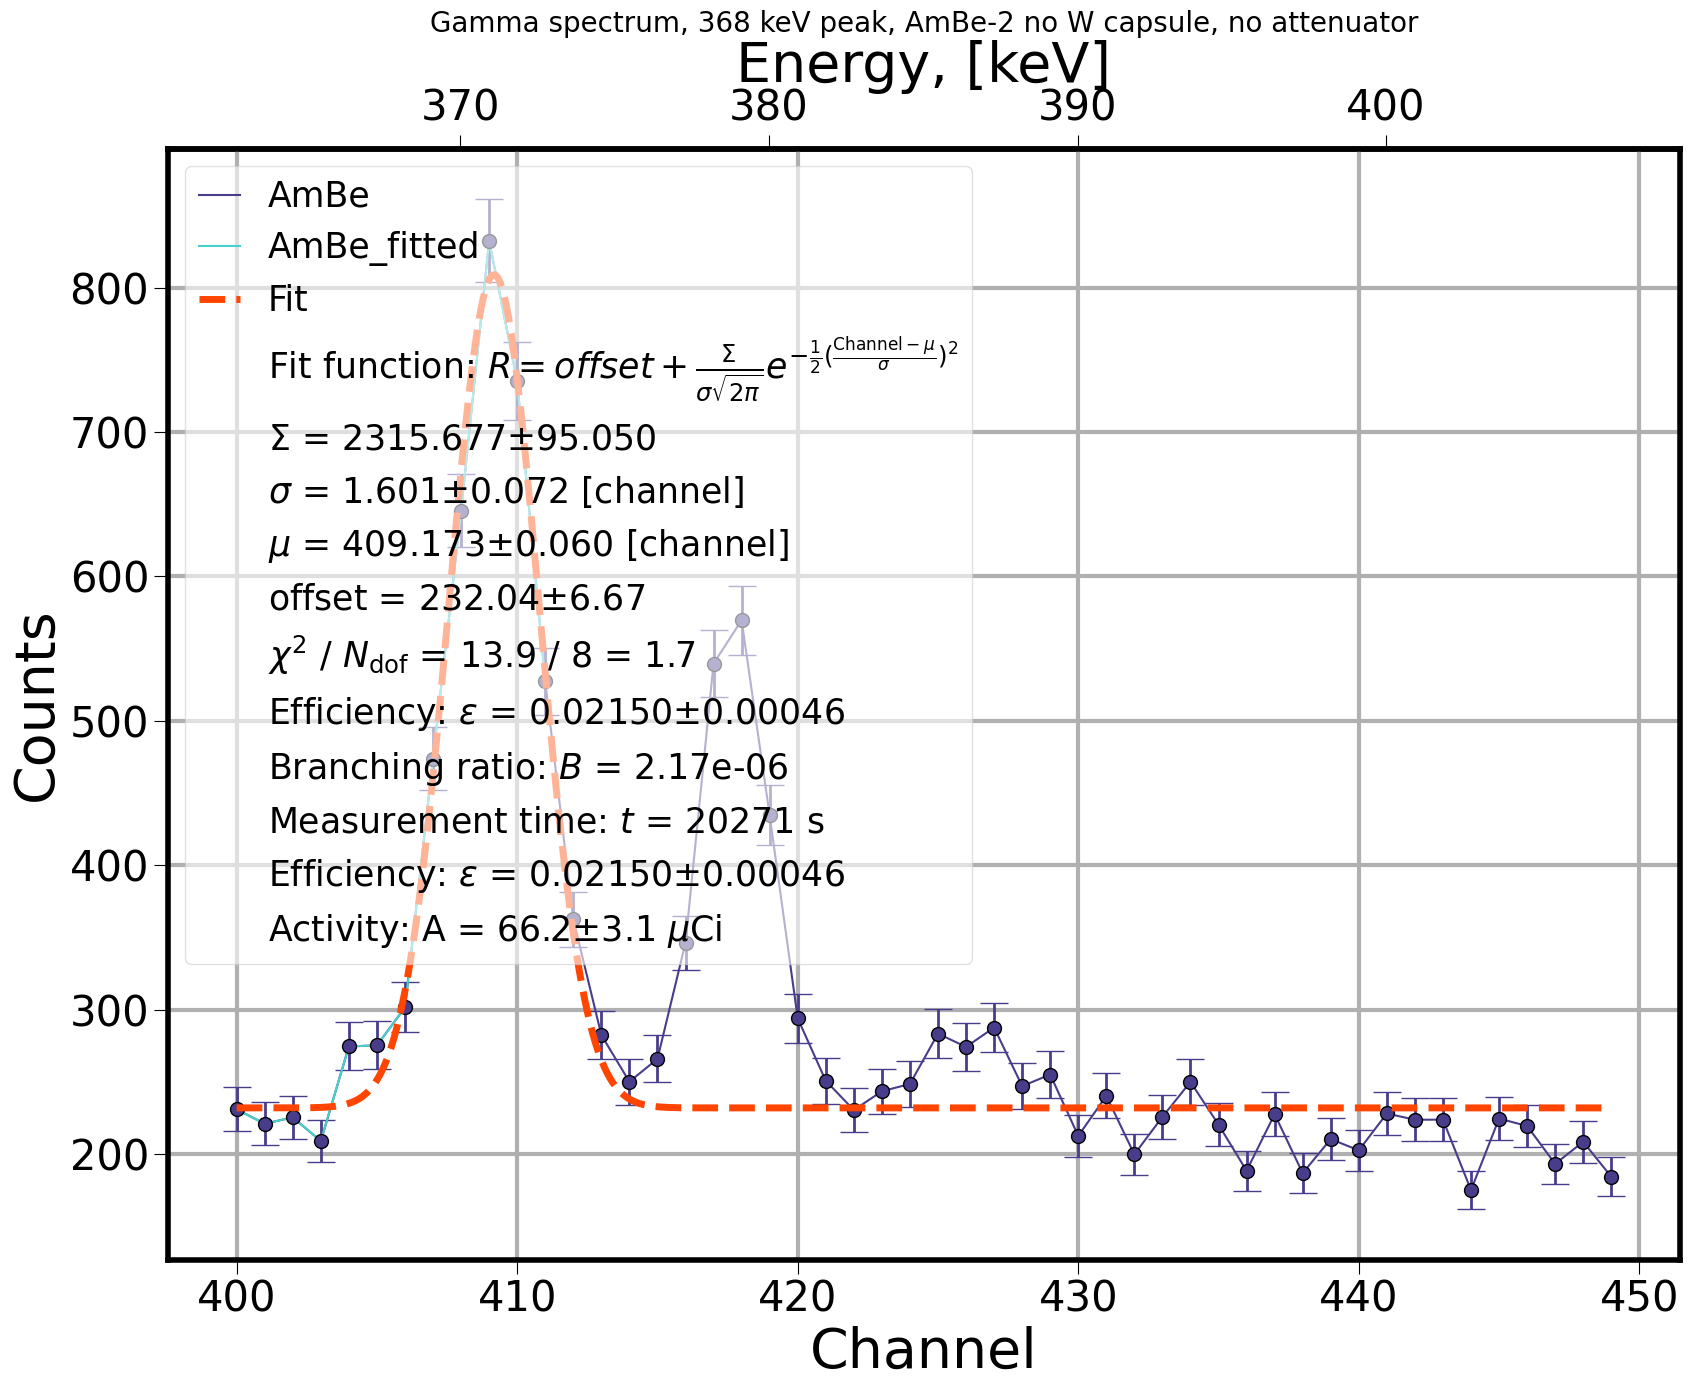

In [10]:
#define variables for the order of plotting
analysis_extra_kwargs = {"zorder":200}
analysis_kwargs = {"zorder":100}
level_kwargs = {"zorder":80}
data_kwargs = {"zorder":50}
error_kwargs = {"zorder":25}
grid_kwargs = {"zorder":0}

#plotting parameters
label_size = 14
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size
plt.rcParams['figure.figsize'] = (17.0, 14.0)
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['grid.linewidth'] = 3
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1

plt.rcParams['legend.handlelength'] = 1.17
plt.rcParams['legend.handleheight'] = 0.65


#define fit function for average pulse
from scipy.integrate import quad
from decimal import Decimal

from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerLine2D

import iminuit


import scipy
from scipy.signal import find_peaks, peak_widths,hilbert
    
# allow complete fit output information  to be displayed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares


# Define function and its inverse
f = lambda x: (x-p0)/p1
g = lambda x: p1*x+p0

plt.figure()
fig, ax1 = plt.subplots()

plt.title('Gamma spectrum, 368 keV peak, AmBe-2 no W capsule, no attenuator', fontsize=20)

ax2 = ax1.secondary_xaxis("top", functions=(f,g))



#label the axes
ax1.set_xlabel( "Channel", fontsize=40)
ax2.set_xlabel( "Energy, [keV]", fontsize=40)
ax1.set_ylabel( u"Counts", fontsize=40)

#set axes tick parameters
for tl in ax1.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)
    
for tl in ax2.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)

for tl in ax1.get_yticklabels():
    tl.set_color('black')
    tl.set_size(30)

ax1.tick_params(length=10)
ax2.tick_params(length=10)

fig.tight_layout()









channels=np.asarray(scan[0][0][400:450])
counts_no_bkg=np.asarray(scan[0][1])[400:450]-np.asarray(bkg[400:450])/t_bkg*t
counts_no_bkg_err=np.sqrt(np.asarray(scan[0][1])[400:450]-np.asarray(bkg[400:450])/t_bkg*t)

channels_to_fit=np.asarray(scan[0][0][400:412])
counts_no_bkg_to_fit=np.asarray(scan[0][1])[400:412]-np.asarray(bkg[400:412])/t_bkg*t
counts_no_bkg_err_to_fit=np.sqrt(np.asarray(scan[0][1])[400:412]-np.asarray(bkg[400:412])/t_bkg*t)



handlelist=[]
labellist=[]


Data, = ax1.plot(channels, counts_no_bkg, 
                          color="darkslateblue", label="AmBe",  **error_kwargs)

data_err = plt.errorbar(channels, counts_no_bkg, yerr=np.array(counts_no_bkg_err), fmt='o', mec='black', 
                            mew=1, color = 'darkslateblue', markersize=1, elinewidth=2, capthick=10, capsize=10, **error_kwargs)

data = ax1.scatter(channels, counts_no_bkg, label=r'Data', edgecolors='black', 
                              marker="o", color="darkslateblue", s=100, **analysis_kwargs)


handlelist.append(Data)
labellist.append(Data.get_label())







#define fit function
def normal_distribution(x, A, sig, mu, offset):
    return offset+A/np.sqrt(2*math.pi)/sig * np.exp(-1/2*((x-mu)/sig)**2)





#perform a least squares fit with iminuit
least_squares = LeastSquares(channels_to_fit, counts_no_bkg_to_fit, counts_no_bkg_err_to_fit,normal_distribution)





#set initial parameter values
A00 = 1500
mu00 = 410
sig00 = 1 
offset00 = 160

#assemble list fit arguments for the minimizer
namelist = ['A', 'sig', 'mu','offset']
kwargs = dict(A=A00, sig=sig00, mu=mu00, offset=offset00)


#create iminuit minimizer
minuit = iminuit.Minuit(least_squares, **kwargs, name=namelist ) 
    
#minuit.fixed["offset"] = True
    
#set parameter limits
#minuit.limits["bkg"] = (-2e-2,0)



#run minimization  
minuit.migrad()
#minuit.minos()# run uncertainty estimator
#minuit.hesse()# run uncertainty estimator

#print fit results
print(minuit.values)
print(minuit.errors)
# see iminuit tutorial on how to give initial value/range/error

#create tuple of fit parameter result values, to pass to the fit function
argtuple=tuple(minuit.values)
#argtuple=tuple(minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset'])

print(argtuple)



#plot the fit curve
fit=[]
ch = []
chmin=channels[0]
chmax=channels[len(channels)-1]
k=chmin
k_end=chmax

while k<=k_end:
    ch.append(k)
    fit.append(normal_distribution(k, minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset']))
    k+=0.1

Data_fit, = ax1.plot(channels_to_fit, counts_no_bkg_to_fit, 
                          color="mediumturquoise", label="AmBe_fitted",  **error_kwargs)

handlelist.append(Data_fit)
labellist.append(Data_fit.get_label())

Fit, = plt.plot(np.asarray(ch), np.asarray(fit), c='orangered', 
                           linewidth=5, linestyle='dashed', label = 'Fit', **analysis_extra_kwargs)


handlelist.append(Fit)
labellist.append(Fit.get_label())
    
text10= 'Fit function: ' + r'$I_{\mathrm{FC}}(B) = bkg + \sum _{i}\frac{A_i}{\sigma _i \sqrt{2 \pi} } e^{-\frac{1}{2} (\frac{B-B^\mathrm{central}_i}{\sigma _i})^2}$'


text_chi_1 = f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {len(counts_no_bkg) - minuit.nfit} = {minuit.fval / (len(counts_no_bkg) - minuit.nfit) :.1f}"


extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    





#short legend
leg = plt.legend(handles=[Data, Fit, extra, extra], 
                 labels = [Data.get_label(), Fit.get_label(), text10, text_chi_1],
                 prop={'size': 25}, loc = 'upper left', fancybox=True, framealpha=0.6)
leg.set_zorder(300)





extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)

text=[r'Fit function: ' + r'$R = offset + \frac{\Sigma}{\sigma \sqrt{2 \pi} } e^{-\frac{1}{2} (\frac{\mathrm{Channel}-\mu}{\sigma })^2}$',
      r'$\Sigma$'+' = {}$\pm${}'.format(round(Decimal(minuit.values['A']),number_sigdigs(minuit.errors['A'])), 
                                        round(Decimal(minuit.errors['A']),number_sigdigs(minuit.errors['A']))),
      r'$\sigma$'+' = {}$\pm${} [channel]'.format(round(Decimal(minuit.values['sig']),number_sigdigs(minuit.errors['sig'])), 
                                        round(Decimal(minuit.errors['sig']),number_sigdigs(minuit.errors['sig']))),
      r'$\mu$'+' = {}$\pm${} [channel]'.format(round(Decimal(minuit.values['mu']),number_sigdigs(minuit.errors['mu'])), 
                                        round(Decimal(minuit.errors['mu']),number_sigdigs(minuit.errors['mu']))),
      r'offset'+' = {}$\pm${}'.format(round(Decimal(minuit.values['offset']),number_sigdigs(minuit.errors['offset'])), 
                                        round(Decimal(minuit.errors['offset']),number_sigdigs(minuit.errors['offset']))),
      f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {len(counts_no_bkg_to_fit) - minuit.nfit} = {minuit.fval / (len(counts_no_bkg_to_fit) - minuit.nfit) :.1f}"

     ]



for string in text:
    handlelist.append(extra)
    labellist.append(string)




import scipy.integrate as integrate

B=2.17e-6
efficiency=0.0215
efficiency_err=0.00046


area = integrate.quad(lambda x: normal_distribution(x, minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset']), 100, 250)




handlelist.append(extra)
labellist.append("Efficiency: $\epsilon$ = {}$\pm${}".format(round(Decimal(efficiency),5), 
                                        round(Decimal(efficiency_err),5)))

handlelist.append(extra)
labellist.append("Branching ratio: $B$ = {}".format(B))
                 
handlelist.append(extra)
labellist.append("Measurement time: $t$ = {} s".format(t))

handlelist.append(extra)
labellist.append("Efficiency: $\epsilon$ = {}$\pm${}".format(round(Decimal(efficiency),5), 
                                        round(Decimal(efficiency_err),5)))

activity=minuit.values['A']/efficiency/B/t/3.7e10*1e6
activity_err=np.sqrt((minuit.errors['A']/efficiency/t/B/3.7e10*1e6)**2+(minuit.values['A']*efficiency_err/efficiency**2/t/B/3.7e10*1e6)**2)
handlelist.append(extra)
labellist.append("Activity: A = {}$\pm${} $\mu$Ci".format(round(Decimal(activity),1), 
                                        round(Decimal(activity_err),1)))


time_check=minuit.values['A']/efficiency/B/activity/3.7e10*1e6
print(time_check)

fig.tight_layout()



ax1.grid() # add grid to the plot

#short legend
leg = plt.legend(handles=handlelist, 
                 labels = labellist,
                 prop={'size': 25}, loc = 'upper left', fancybox=True, framealpha=0.6)
leg.set_zorder(300)
#save and show the plot
plt.savefig(measurement_output_path+"Gamma_spectrum_vs_bkg_AmBe-2_noW_noAt_ADC-Ch_fit_368keV-photopeak_counts.png", bbox_inches ='tight')
plt.show()

#activity_mean.append(activity)
#activity_err_mean.append(activity_err)
#peak_energy.append(368)

<Figure size 1700x1400 with 0 Axes>

Text(0.5, 1.0, 'Gamma spectrum, 376 keV peak, AmBe-2 no W capsule, no attenuator')

Text(0.5, 0, 'Channel')

Text(0.5, 0, 'Energy, [keV]')

Text(0, 0.5, 'Counts')

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 115 (χ²/ndof = 3.5)        │              Nfcn = 118              │
│ EDM = 2.49e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A      │  1.12e3   │  0.06e3   │            │            │         │         │       │
│ 1 │ sig    │   1.26    │   0.07    │            │            │         │         │       │
│ 2 │ mu     │  417.73   │   0.07    │            │            │         │         │       │
│ 3 │ offset │   224.7   │    2.8    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────┐
│        │        A      sig       mu   offset │
├────────┼─────────────────────────────────────┤
│      A │ 3.14e+03    1.909    0.027      -54 │
│    sig │    1.909   0.0051    0.000   -0.052 │
│     mu │    0.027    0.000  0.00448   -0.001 │
│ offset │      -54   -0.052   -0.001     7.54 │
└────────┴─────────────────────────────────────┘

<ValueView A=1123.6437145572581 sig=1.2636221307994624 mu=417.73150405821866 offset=224.65016868985333>
<ErrorView A=56.03538872455798 sig=0.07138987173224039 mu=0.06690076696402833 offset=2.7466411976297893>
(1123.6437145572581, 1.2636221307994624, 417.73150405821866, 224.65016868985333)
20271.0


/tmp/ipykernel_76736/613626331.py:283: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


<Figure size 1700x1400 with 0 Axes>

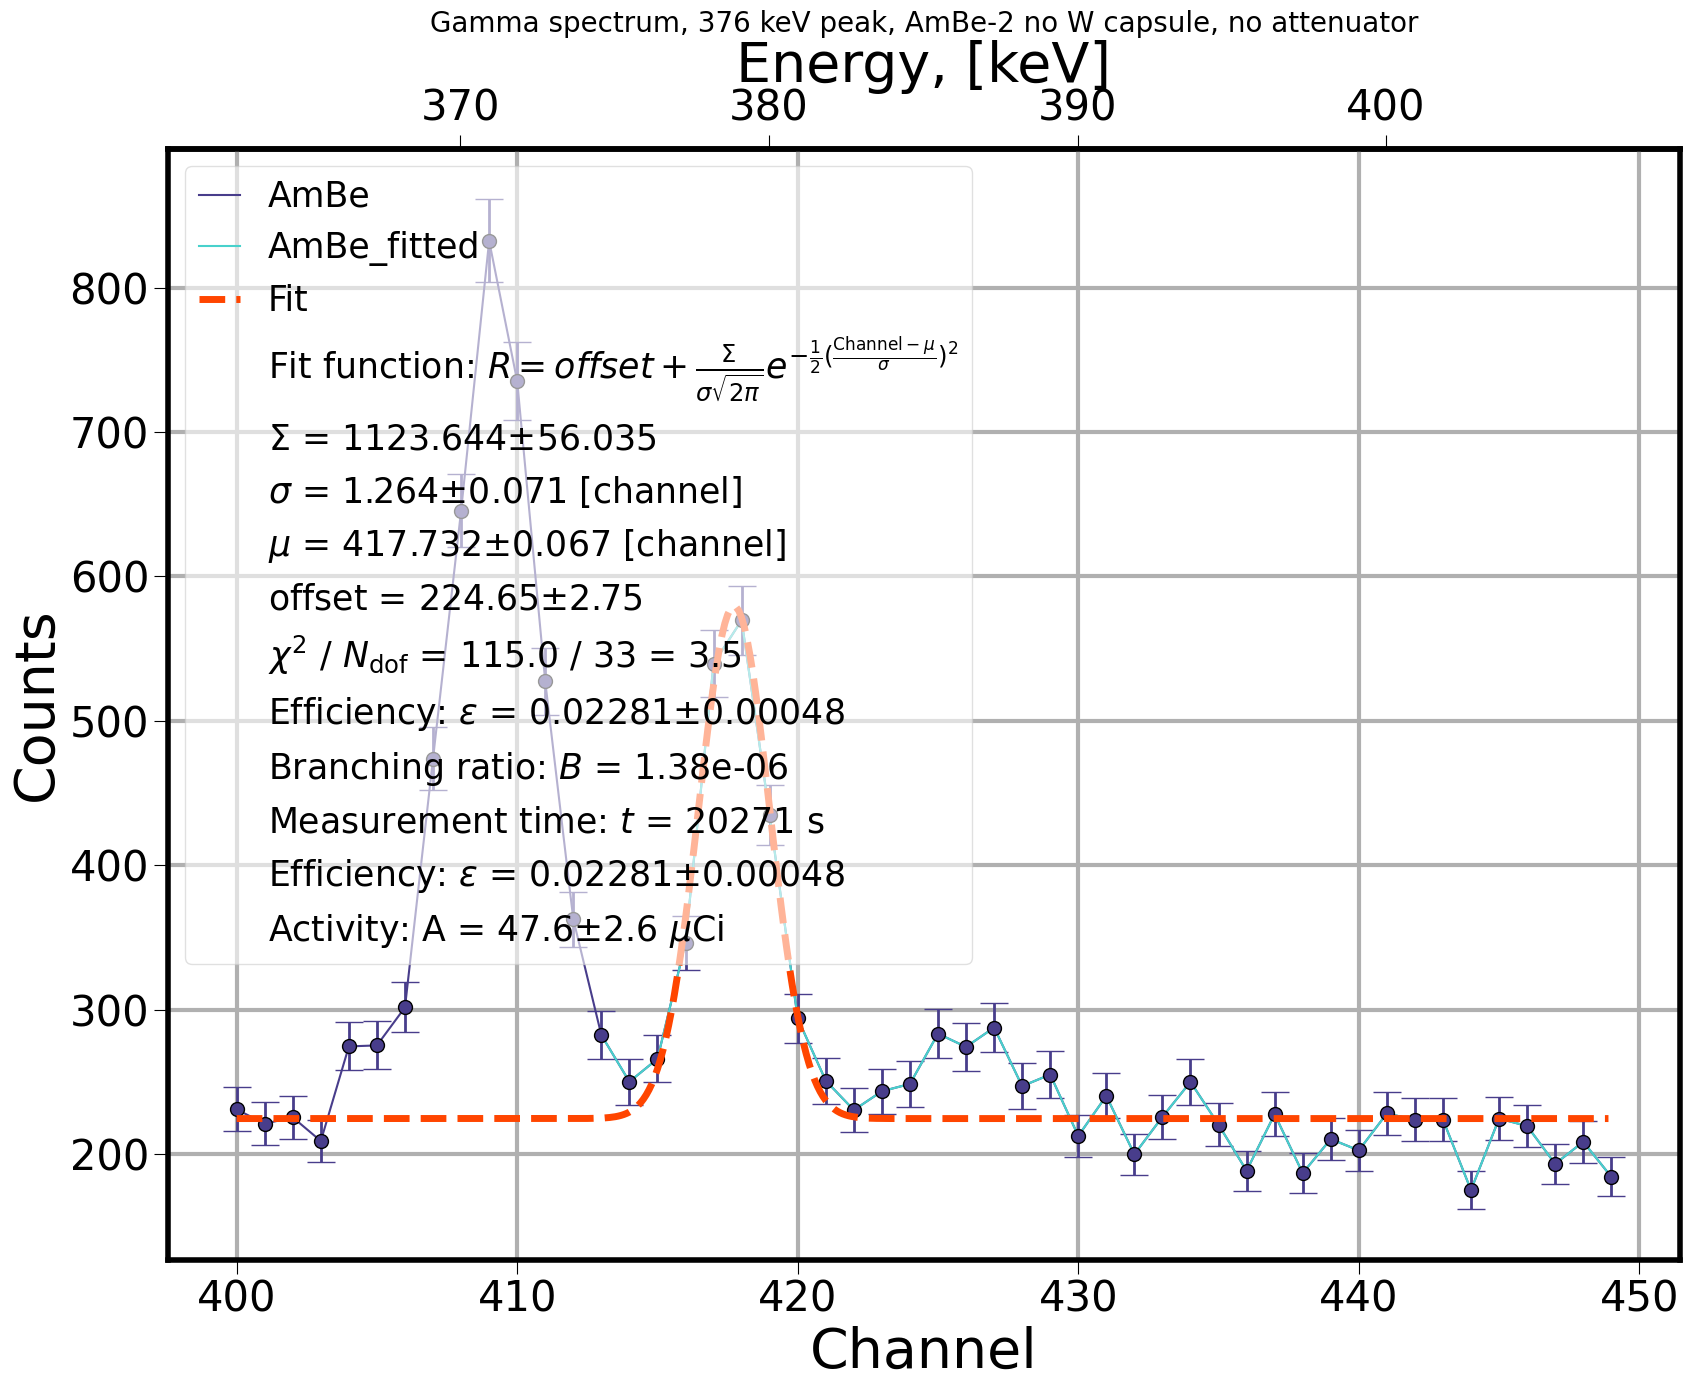

In [11]:
#define variables for the order of plotting
analysis_extra_kwargs = {"zorder":200}
analysis_kwargs = {"zorder":100}
level_kwargs = {"zorder":80}
data_kwargs = {"zorder":50}
error_kwargs = {"zorder":25}
grid_kwargs = {"zorder":0}

#plotting parameters
label_size = 14
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size
plt.rcParams['figure.figsize'] = (17.0, 14.0)
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['grid.linewidth'] = 3
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1

plt.rcParams['legend.handlelength'] = 1.17
plt.rcParams['legend.handleheight'] = 0.65


#define fit function for average pulse
from scipy.integrate import quad
from decimal import Decimal

from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerLine2D

import iminuit


import scipy
from scipy.signal import find_peaks, peak_widths,hilbert
    
# allow complete fit output information  to be displayed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares



plt.figure()
fig, ax1 = plt.subplots()

plt.title('Gamma spectrum, 376 keV peak, AmBe-2 no W capsule, no attenuator', fontsize=20)

ax2 = ax1.secondary_xaxis("top", functions=(f,g))



#label the axes
ax1.set_xlabel( "Channel", fontsize=40)
ax2.set_xlabel( "Energy, [keV]", fontsize=40)
ax1.set_ylabel( u"Counts", fontsize=40)

#set axes tick parameters
for tl in ax1.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)
    
for tl in ax2.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)

for tl in ax1.get_yticklabels():
    tl.set_color('black')
    tl.set_size(30)

ax1.tick_params(length=10)
ax2.tick_params(length=10)

fig.tight_layout()









channels=np.asarray(scan[0][0][400:450])
counts_no_bkg=np.asarray(scan[0][1])[400:450]-np.asarray(bkg[400:450])/t_bkg*t
counts_no_bkg_err=np.sqrt(np.asarray(scan[0][1])[400:450]-np.asarray(bkg[400:450])/t_bkg*t)

channels_to_fit=np.asarray(scan[0][0][413:450])
counts_no_bkg_to_fit=np.asarray(scan[0][1])[413:450]-np.asarray(bkg[413:450])/t_bkg*t
counts_no_bkg_err_to_fit=np.sqrt(np.asarray(scan[0][1])[413:450]-np.asarray(bkg[413:450])/t_bkg*t)



handlelist=[]
labellist=[]


Data, = ax1.plot(channels, counts_no_bkg, 
                          color="darkslateblue", label="AmBe",  **error_kwargs)

data_err = plt.errorbar(channels, counts_no_bkg, yerr=np.array(counts_no_bkg_err), fmt='o', mec='black', 
                            mew=1, color = 'darkslateblue', markersize=1, elinewidth=2, capthick=10, capsize=10, **error_kwargs)

data = ax1.scatter(channels, counts_no_bkg, label=r'Data', edgecolors='black', 
                              marker="o", color="darkslateblue", s=100, **analysis_kwargs)


handlelist.append(Data)
labellist.append(Data.get_label())







#define fit function
def normal_distribution(x, A, sig, mu, offset):
    return offset+A/np.sqrt(2*math.pi)/sig * np.exp(-1/2*((x-mu)/sig)**2)





#perform a least squares fit with iminuit
least_squares = LeastSquares(channels_to_fit, counts_no_bkg_to_fit, counts_no_bkg_err_to_fit,normal_distribution)





#set initial parameter values
A00 = 1500
mu00 = 416
sig00 = 1 
offset00 = 160

#assemble list fit arguments for the minimizer
namelist = ['A', 'sig', 'mu','offset']
kwargs = dict(A=A00, sig=sig00, mu=mu00, offset=offset00)


#create iminuit minimizer
minuit = iminuit.Minuit(least_squares, **kwargs, name=namelist ) 
    
#minuit.fixed["offset"] = True
    
#set parameter limits
#minuit.limits["bkg"] = (-2e-2,0)



#run minimization  
minuit.migrad()
#minuit.minos()# run uncertainty estimator
#minuit.hesse()# run uncertainty estimator

#print fit results
print(minuit.values)
print(minuit.errors)
# see iminuit tutorial on how to give initial value/range/error

#create tuple of fit parameter result values, to pass to the fit function
argtuple=tuple(minuit.values)
#argtuple=tuple(minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset'])

print(argtuple)



#plot the fit curve
fit=[]
ch = []
chmin=channels[0]
chmax=channels[len(channels)-1]
k=chmin
k_end=chmax

while k<=k_end:
    ch.append(k)
    fit.append(normal_distribution(k, minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset']))
    k+=0.1

Data_fit, = ax1.plot(channels_to_fit, counts_no_bkg_to_fit, 
                          color="mediumturquoise", label="AmBe_fitted",  **error_kwargs)

handlelist.append(Data_fit)
labellist.append(Data_fit.get_label())

Fit, = plt.plot(np.asarray(ch), np.asarray(fit), c='orangered', 
                           linewidth=5, linestyle='dashed', label = 'Fit', **analysis_extra_kwargs)


handlelist.append(Fit)
labellist.append(Fit.get_label())
    
text10= 'Fit function: ' + r'$I_{\mathrm{FC}}(B) = bkg + \sum _{i}\frac{A_i}{\sigma _i \sqrt{2 \pi} } e^{-\frac{1}{2} (\frac{B-B^\mathrm{central}_i}{\sigma _i})^2}$'


text_chi_1 = f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {len(counts_no_bkg) - minuit.nfit} = {minuit.fval / (len(counts_no_bkg) - minuit.nfit) :.1f}"


extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    





#short legend
leg = plt.legend(handles=[Data, Fit, extra, extra], 
                 labels = [Data.get_label(), Fit.get_label(), text10, text_chi_1],
                 prop={'size': 25}, loc = 'upper left', fancybox=True, framealpha=0.6)
leg.set_zorder(300)





extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)

text=[r'Fit function: ' + r'$R = offset + \frac{\Sigma}{\sigma \sqrt{2 \pi} } e^{-\frac{1}{2} (\frac{\mathrm{Channel}-\mu}{\sigma })^2}$',
      r'$\Sigma$'+' = {}$\pm${}'.format(round(Decimal(minuit.values['A']),number_sigdigs(minuit.errors['A'])), 
                                        round(Decimal(minuit.errors['A']),number_sigdigs(minuit.errors['A']))),
      r'$\sigma$'+' = {}$\pm${} [channel]'.format(round(Decimal(minuit.values['sig']),number_sigdigs(minuit.errors['sig'])), 
                                        round(Decimal(minuit.errors['sig']),number_sigdigs(minuit.errors['sig']))),
      r'$\mu$'+' = {}$\pm${} [channel]'.format(round(Decimal(minuit.values['mu']),number_sigdigs(minuit.errors['mu'])), 
                                        round(Decimal(minuit.errors['mu']),number_sigdigs(minuit.errors['mu']))),
      r'offset'+' = {}$\pm${}'.format(round(Decimal(minuit.values['offset']),number_sigdigs(minuit.errors['offset'])), 
                                        round(Decimal(minuit.errors['offset']),number_sigdigs(minuit.errors['offset']))),
      f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {len(counts_no_bkg_to_fit) - minuit.nfit} = {minuit.fval / (len(counts_no_bkg_to_fit) - minuit.nfit) :.1f}"

     ]



for string in text:
    handlelist.append(extra)
    labellist.append(string)




import scipy.integrate as integrate

B=1.38e-6
efficiency=0.02281
efficiency_err=0.00048


area = integrate.quad(lambda x: normal_distribution(x, minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset']), 100, 250)




handlelist.append(extra)
labellist.append("Efficiency: $\epsilon$ = {}$\pm${}".format(round(Decimal(efficiency),5), 
                                        round(Decimal(efficiency_err),5)))

handlelist.append(extra)
labellist.append("Branching ratio: $B$ = {}".format(B))
                 
handlelist.append(extra)
labellist.append("Measurement time: $t$ = {} s".format(t))

handlelist.append(extra)
labellist.append("Efficiency: $\epsilon$ = {}$\pm${}".format(round(Decimal(efficiency),5), 
                                        round(Decimal(efficiency_err),5)))

activity=minuit.values['A']/efficiency/B/t/3.7e10*1e6
activity_err=np.sqrt((minuit.errors['A']/efficiency/t/B/3.7e10*1e6)**2+(minuit.values['A']*efficiency_err/efficiency**2/t/B/3.7e10*1e6)**2)
handlelist.append(extra)
labellist.append("Activity: A = {}$\pm${} $\mu$Ci".format(round(Decimal(activity),1), 
                                        round(Decimal(activity_err),1)))


time_check=minuit.values['A']/efficiency/B/activity/3.7e10*1e6
print(time_check)

fig.tight_layout()



ax1.grid() # add grid to the plot

#short legend
leg = plt.legend(handles=handlelist, 
                 labels = labellist,
                 prop={'size': 25}, loc = 'upper left', fancybox=True, framealpha=0.6)
leg.set_zorder(300)
#save and show the plot
plt.savefig(measurement_output_path+"Gamma_spectrum_vs_bkg_AmBe-2_noW_noAt_ADC-Ch_fit_376keV-photopeak_counts.png", bbox_inches ='tight')
plt.show()

#activity_mean.append(activity)
#activity_err_mean.append(activity_err)
#peak_energy.append(376)

<Figure size 1700x1400 with 0 Axes>

Text(0.5, 1.0, 'Gamma spectrum, 376 keV peak, AmBe-2 no W capsule, no attenuator')

Text(0.5, 0, 'Channel')

Text(0.5, 0, 'Energy, [keV]')

Text(0, 0.5, 'Counts')

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 100.9 (χ²/ndof = 3.3)      │              Nfcn = 108              │
│ EDM = 0.000114 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A      │  1.13e3   │  0.06e3   │            │            │         │         │       │
│ 1 │ sig    │   1.26    │   0.07    │            │            │         │         │       │
│ 2 │ mu     │  417.74   │   0.07    │            │            │         │         │       │
│ 3 │ offset │   222.5   │    2.8    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────┐
│        │       A     sig      mu  offset │
├────────┼─────────────────────────────────┤
│      A │ 3.1e+03   1.765   0.076     -54 │
│    sig │   1.765 0.00468   0.000  -0.046 │
│     mu │   0.076   0.000 0.00441  -0.003 │
│ offset │     -54  -0.046  -0.003    7.86 │
└────────┴─────────────────────────────────┘

<ValueView A=1133.2404933107528 sig=1.2628003326488118 mu=417.73680660723704 offset=222.53163399216695>
<ErrorView A=55.639899746915354 sig=0.06844385740781772 mu=0.06640793897129452 offset=2.8035982932877612>
(1133.2404933107528, 1.2628003326488118, 417.73680660723704, 222.53163399216695)
20271.0


/tmp/ipykernel_76736/1251591569.py:285: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


<Figure size 1700x1400 with 0 Axes>

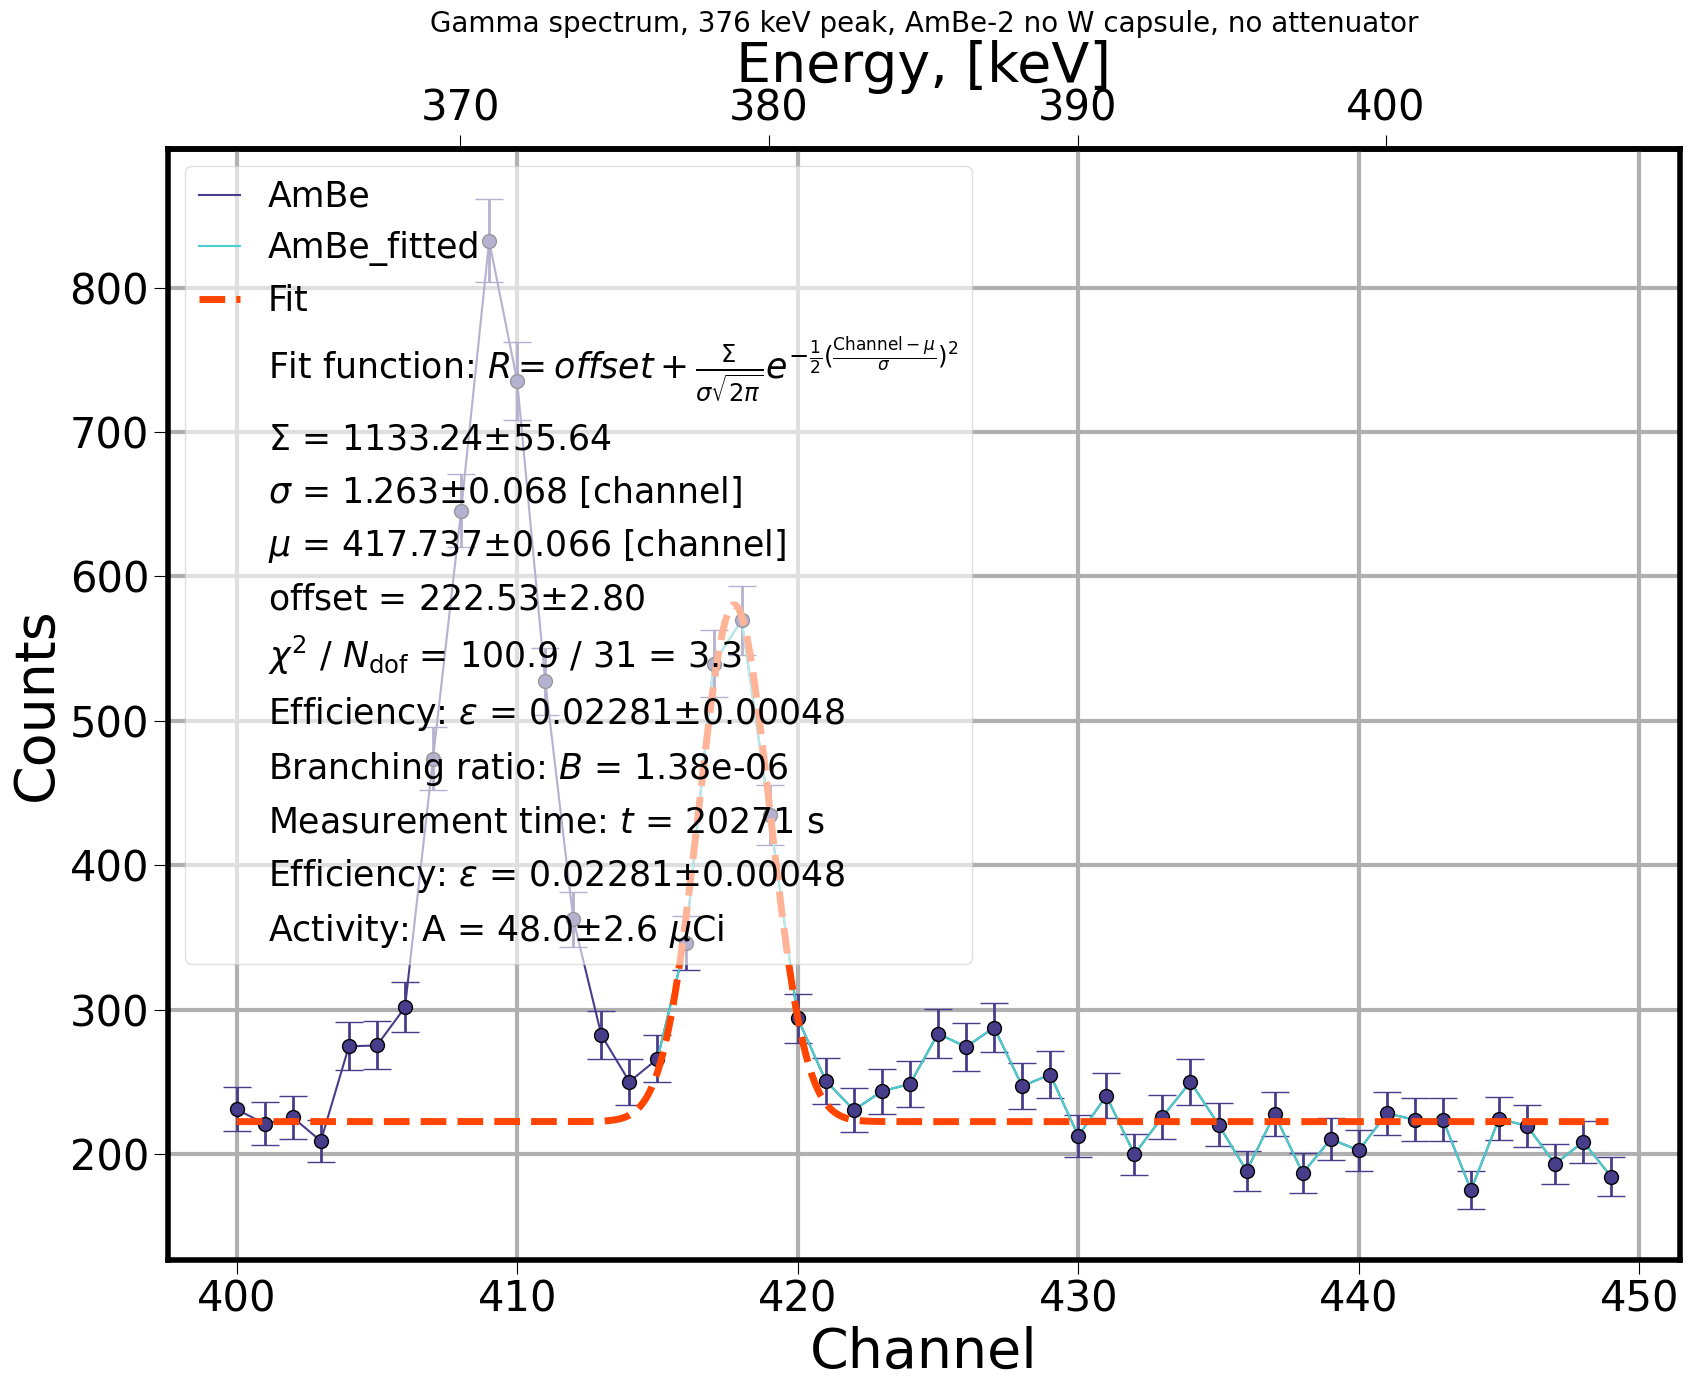

In [12]:
#define variables for the order of plotting
analysis_extra_kwargs = {"zorder":200}
analysis_kwargs = {"zorder":100}
level_kwargs = {"zorder":80}
data_kwargs = {"zorder":50}
error_kwargs = {"zorder":25}
grid_kwargs = {"zorder":0}

#plotting parameters
label_size = 14
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size
plt.rcParams['figure.figsize'] = (17.0, 14.0)
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['grid.linewidth'] = 3
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1

plt.rcParams['legend.handlelength'] = 1.17
plt.rcParams['legend.handleheight'] = 0.65


#define fit function for average pulse
from scipy.integrate import quad
from decimal import Decimal

from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerLine2D

import iminuit


import scipy
from scipy.signal import find_peaks, peak_widths,hilbert
    
# allow complete fit output information  to be displayed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

# Define function and its inverse
f = lambda x: (x-p0)/p1
g = lambda x: p1*x+p0

plt.figure()
fig, ax1 = plt.subplots()

plt.title('Gamma spectrum, 376 keV peak, AmBe-2 no W capsule, no attenuator', fontsize=20)

ax2 = ax1.secondary_xaxis("top", functions=(f,g))



#label the axes
ax1.set_xlabel( "Channel", fontsize=40)
ax2.set_xlabel( "Energy, [keV]", fontsize=40)
ax1.set_ylabel( u"Counts", fontsize=40)

#set axes tick parameters
for tl in ax1.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)
    
for tl in ax2.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)

for tl in ax1.get_yticklabels():
    tl.set_color('black')
    tl.set_size(30)

ax1.tick_params(length=10)
ax2.tick_params(length=10)

fig.tight_layout()









channels=np.asarray(scan[0][0][400:450])
counts_no_bkg=np.asarray(scan[0][1])[400:450]-np.asarray(bkg[400:450])/t_bkg*t
counts_no_bkg_err=np.sqrt(np.asarray(scan[0][1])[400:450]-np.asarray(bkg[400:450])/t_bkg*t)

channels_to_fit=np.asarray(scan[0][0][415:450])
counts_no_bkg_to_fit=np.asarray(scan[0][1])[415:450]-np.asarray(bkg[415:450])/t_bkg*t
counts_no_bkg_err_to_fit=np.sqrt(np.asarray(scan[0][1])[415:450]-np.asarray(bkg[415:450])/t_bkg*t)



handlelist=[]
labellist=[]


Data, = ax1.plot(channels, counts_no_bkg, 
                          color="darkslateblue", label="AmBe",  **error_kwargs)

data_err = plt.errorbar(channels, counts_no_bkg, yerr=np.array(counts_no_bkg_err), fmt='o', mec='black', 
                            mew=1, color = 'darkslateblue', markersize=1, elinewidth=2, capthick=10, capsize=10, **error_kwargs)

data = ax1.scatter(channels, counts_no_bkg, label=r'Data', edgecolors='black', 
                              marker="o", color="darkslateblue", s=100, **analysis_kwargs)


handlelist.append(Data)
labellist.append(Data.get_label())







#define fit function
def normal_distribution(x, A, sig, mu, offset):
    return offset+A/np.sqrt(2*math.pi)/sig * np.exp(-1/2*((x-mu)/sig)**2)





#perform a least squares fit with iminuit
least_squares = LeastSquares(channels_to_fit, counts_no_bkg_to_fit, counts_no_bkg_err_to_fit,normal_distribution)





#set initial parameter values
A00 = 1500
mu00 = 416
sig00 = 1 
offset00 = 160

#assemble list fit arguments for the minimizer
namelist = ['A', 'sig', 'mu','offset']
kwargs = dict(A=A00, sig=sig00, mu=mu00, offset=offset00)


#create iminuit minimizer
minuit = iminuit.Minuit(least_squares, **kwargs, name=namelist ) 
    
#minuit.fixed["offset"] = True
    
#set parameter limits
#minuit.limits["bkg"] = (-2e-2,0)



#run minimization  
minuit.migrad()
#minuit.minos()# run uncertainty estimator
#minuit.hesse()# run uncertainty estimator

#print fit results
print(minuit.values)
print(minuit.errors)
# see iminuit tutorial on how to give initial value/range/error

#create tuple of fit parameter result values, to pass to the fit function
argtuple=tuple(minuit.values)
#argtuple=tuple(minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset'])

print(argtuple)



#plot the fit curve
fit=[]
ch = []
chmin=channels[0]
chmax=channels[len(channels)-1]
k=chmin
k_end=chmax

while k<=k_end:
    ch.append(k)
    fit.append(normal_distribution(k, minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset']))
    k+=0.1

Data_fit, = ax1.plot(channels_to_fit, counts_no_bkg_to_fit, 
                          color="mediumturquoise", label="AmBe_fitted",  **error_kwargs)

handlelist.append(Data_fit)
labellist.append(Data_fit.get_label())

Fit, = plt.plot(np.asarray(ch), np.asarray(fit), c='orangered', 
                           linewidth=5, linestyle='dashed', label = 'Fit', **analysis_extra_kwargs)


handlelist.append(Fit)
labellist.append(Fit.get_label())
    
text10= 'Fit function: ' + r'$I_{\mathrm{FC}}(B) = bkg + \sum _{i}\frac{A_i}{\sigma _i \sqrt{2 \pi} } e^{-\frac{1}{2} (\frac{B-B^\mathrm{central}_i}{\sigma _i})^2}$'


text_chi_1 = f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {len(counts_no_bkg) - minuit.nfit} = {minuit.fval / (len(counts_no_bkg) - minuit.nfit) :.1f}"


extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    





#short legend
leg = plt.legend(handles=[Data, Fit, extra, extra], 
                 labels = [Data.get_label(), Fit.get_label(), text10, text_chi_1],
                 prop={'size': 25}, loc = 'upper left', fancybox=True, framealpha=0.6)
leg.set_zorder(300)





extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)

text=[r'Fit function: ' + r'$R = offset + \frac{\Sigma}{\sigma \sqrt{2 \pi} } e^{-\frac{1}{2} (\frac{\mathrm{Channel}-\mu}{\sigma })^2}$',
      r'$\Sigma$'+' = {}$\pm${}'.format(round(Decimal(minuit.values['A']),number_sigdigs(minuit.errors['A'])), 
                                        round(Decimal(minuit.errors['A']),number_sigdigs(minuit.errors['A']))),
      r'$\sigma$'+' = {}$\pm${} [channel]'.format(round(Decimal(minuit.values['sig']),number_sigdigs(minuit.errors['sig'])), 
                                        round(Decimal(minuit.errors['sig']),number_sigdigs(minuit.errors['sig']))),
      r'$\mu$'+' = {}$\pm${} [channel]'.format(round(Decimal(minuit.values['mu']),number_sigdigs(minuit.errors['mu'])), 
                                        round(Decimal(minuit.errors['mu']),number_sigdigs(minuit.errors['mu']))),
      r'offset'+' = {}$\pm${}'.format(round(Decimal(minuit.values['offset']),number_sigdigs(minuit.errors['offset'])), 
                                        round(Decimal(minuit.errors['offset']),number_sigdigs(minuit.errors['offset']))),
      f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {len(counts_no_bkg_to_fit) - minuit.nfit} = {minuit.fval / (len(counts_no_bkg_to_fit) - minuit.nfit) :.1f}"

     ]



for string in text:
    handlelist.append(extra)
    labellist.append(string)




import scipy.integrate as integrate

B=1.38e-6
efficiency=0.02281
efficiency_err=0.00048


area = integrate.quad(lambda x: normal_distribution(x, minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset']), 100, 250)




handlelist.append(extra)
labellist.append("Efficiency: $\epsilon$ = {}$\pm${}".format(round(Decimal(efficiency),5), 
                                        round(Decimal(efficiency_err),5)))

handlelist.append(extra)
labellist.append("Branching ratio: $B$ = {}".format(B))
                 
handlelist.append(extra)
labellist.append("Measurement time: $t$ = {} s".format(t))

handlelist.append(extra)
labellist.append("Efficiency: $\epsilon$ = {}$\pm${}".format(round(Decimal(efficiency),5), 
                                        round(Decimal(efficiency_err),5)))

activity=minuit.values['A']/efficiency/B/t/3.7e10*1e6
activity_err=np.sqrt((minuit.errors['A']/efficiency/t/B/3.7e10*1e6)**2+(minuit.values['A']*efficiency_err/efficiency**2/t/B/3.7e10*1e6)**2)
handlelist.append(extra)
labellist.append("Activity: A = {}$\pm${} $\mu$Ci".format(round(Decimal(activity),1), 
                                        round(Decimal(activity_err),1)))


time_check=minuit.values['A']/efficiency/B/activity/3.7e10*1e6
print(time_check)

fig.tight_layout()



ax1.grid() # add grid to the plot

#short legend
leg = plt.legend(handles=handlelist, 
                 labels = labellist,
                 prop={'size': 25}, loc = 'upper left', fancybox=True, framealpha=0.6)
leg.set_zorder(300)
#save and show the plot
plt.savefig(measurement_output_path+"Gamma_spectrum_vs_bkg_AmBe-2_noW_noAt_ADC-Ch_fit_376keV-photopeak_counts.png", bbox_inches ='tight')
plt.show()


#activity_mean.append(activity)
#activity_err_mean.append(activity_err)
#peak_energy.append(376)

<Figure size 1700x1400 with 0 Axes>

Text(0.5, 1.0, 'Activity of AmBe-2 no W capsule, no attenuator')

Text(0, 0.5, 'Activity')

Text(0.5, 0, 'Energy, [keV]')

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.695 (χ²/ndof = 1.8)      │              Nfcn = 11               │
│ EDM = 1.25e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    0.0    │    0.1    │            │            │         │         │  yes  │
│ 1 │ b    │   53.2    │    0.9    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────┐
│   │     a     b │
├───┼─────────────┤
│ a │     0   0.0 │
│ b │   0.0 0.857 │
└───┴─────────────┘

<ValueView a=0.0 b=53.16161823279349>
<ErrorView a=0.1 b=0.9257547212659208>
(0.0, 53.16161823279349)
653
722


<Figure size 1700x1400 with 0 Axes>

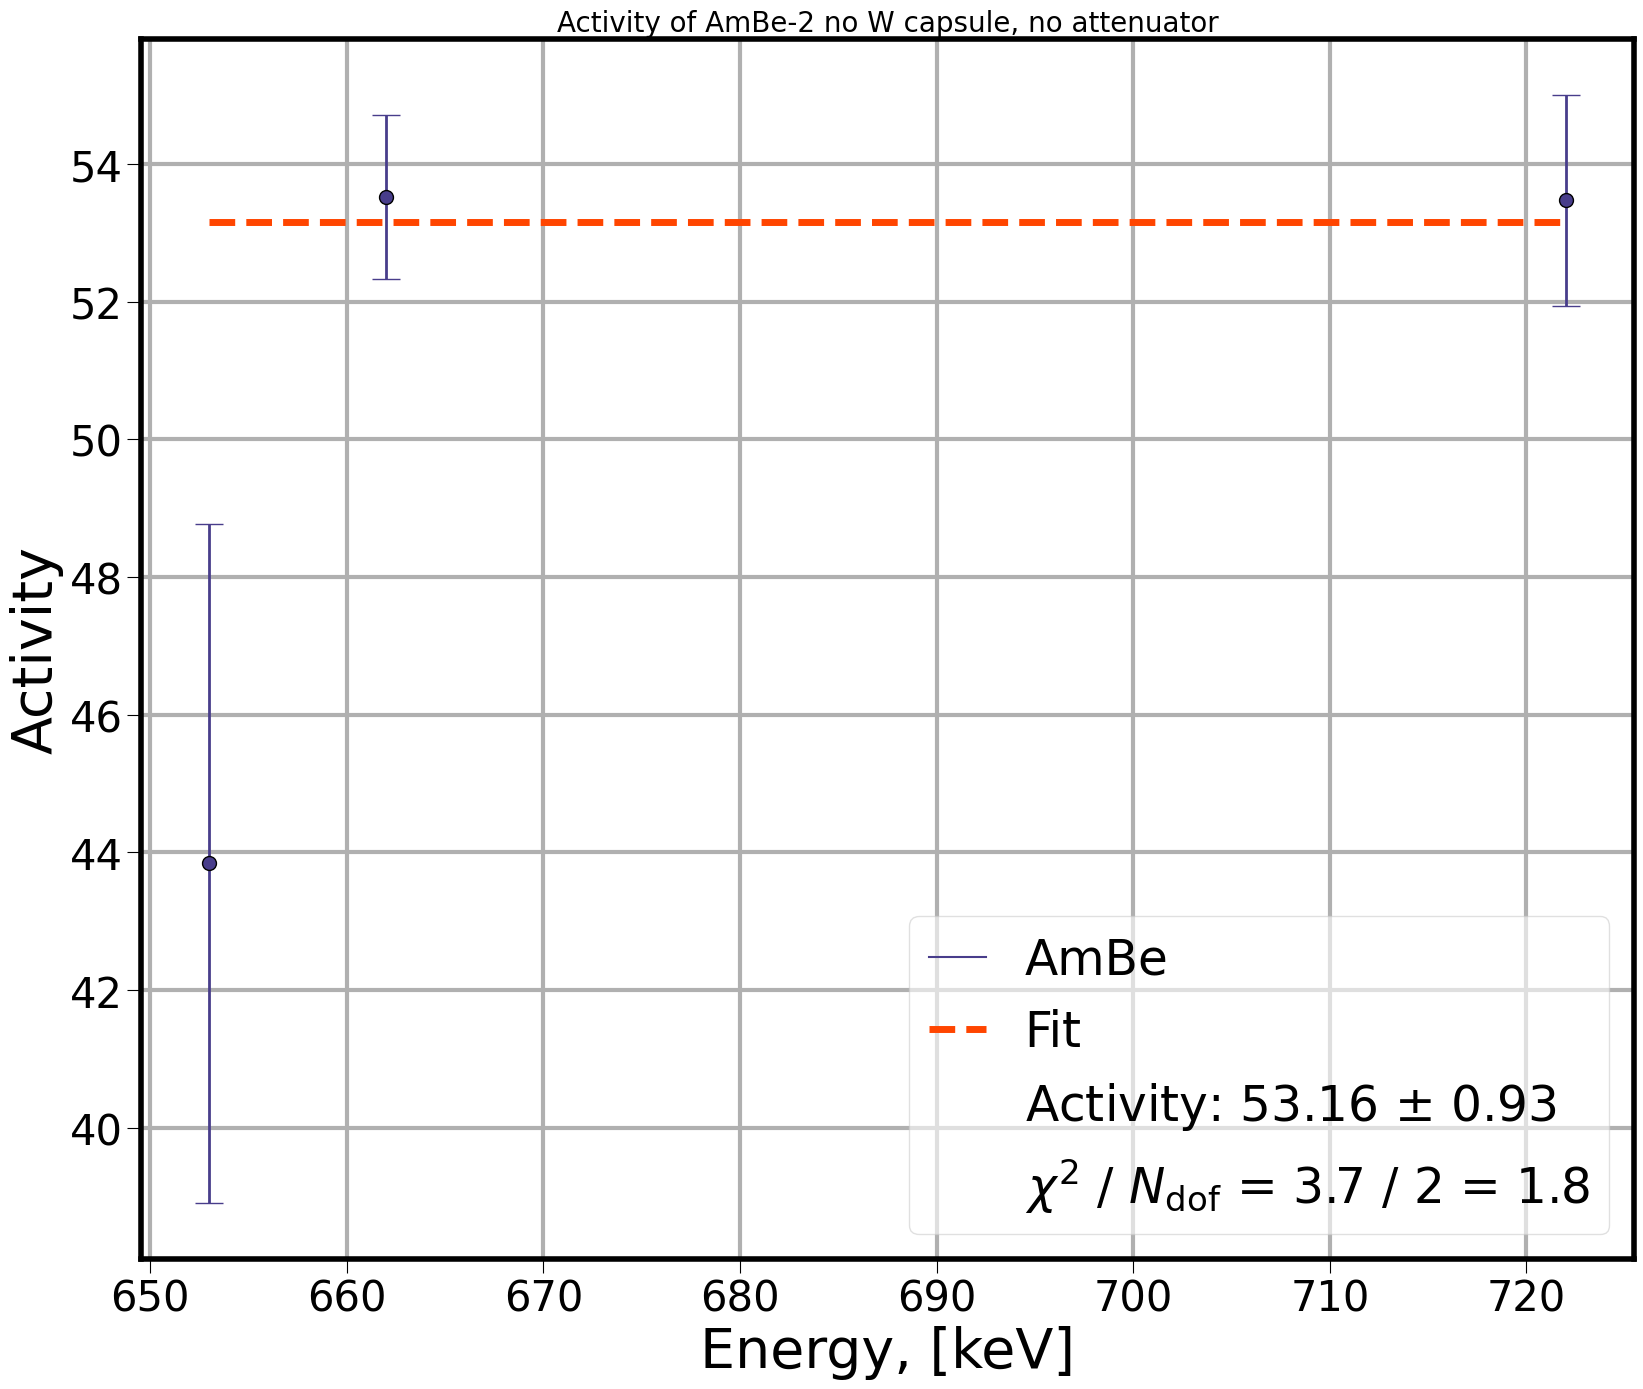

In [13]:
#define variables for the order of plotting
analysis_extra_kwargs = {"zorder":200}
analysis_kwargs = {"zorder":100}
level_kwargs = {"zorder":80}
data_kwargs = {"zorder":50}
error_kwargs = {"zorder":25}
grid_kwargs = {"zorder":0}

#plotting parameters
label_size = 14
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size
plt.rcParams['figure.figsize'] = (17.0, 14.0)
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['grid.linewidth'] = 3
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1

plt.rcParams['legend.handlelength'] = 1.17
plt.rcParams['legend.handleheight'] = 0.65


#define fit function for average pulse
from scipy.integrate import quad
from decimal import Decimal

from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerLine2D

import iminuit


import scipy
from scipy.signal import find_peaks, peak_widths,hilbert
    
# allow complete fit output information  to be displayed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

# Define function and its inverse
f = lambda x: (x-p0)/p1
g = lambda x: p1*x+p0

plt.figure()
fig, ax1 = plt.subplots()

plt.title('Activity of AmBe-2 no W capsule, no attenuator', fontsize=20)




#label the axes
ax1.set_ylabel( "Activity", fontsize=40)
ax1.set_xlabel( "Energy, [keV]", fontsize=40)


#set axes tick parameters
for tl in ax1.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)


for tl in ax1.get_yticklabels():
    tl.set_color('black')
    tl.set_size(30)

ax1.tick_params(length=10)
ax2.tick_params(length=10)

fig.tight_layout()



handlelist=[]
labellist=[]




data_err = plt.errorbar(peak_energy, activity_mean, yerr=np.array(activity_err_mean), fmt='o', mec='black', 
                            mew=1, color = 'darkslateblue', markersize=1, elinewidth=2, capthick=10, capsize=10, **error_kwargs)

data = ax1.scatter(peak_energy, activity_mean, label=r'Data', edgecolors='black', 
                              marker="o", color="darkslateblue", s=100, **analysis_kwargs)


handlelist.append(Data)
labellist.append(Data.get_label())







#define fit function
def line(x, a, b):
    return a*x+b





#perform a least squares fit with iminuit
least_squares = LeastSquares(peak_energy, activity_mean, activity_err_mean, line)





#set initial parameter values
a00=0
b00=45

#assemble list fit arguments for the minimizer
namelist = ['a', 'b']
kwargs = dict(a=a00, b=b00)


#create iminuit minimizer
minuit = iminuit.Minuit(least_squares, **kwargs, name=namelist ) 
    
minuit.fixed["a"] = True
    
#set parameter limits
#minuit.limits["bkg"] = (-2e-2,0)



#run minimization  
minuit.migrad()
#minuit.minos()# run uncertainty estimator
#minuit.hesse()# run uncertainty estimator

#print fit results
print(minuit.values)
print(minuit.errors)
# see iminuit tutorial on how to give initial value/range/error

#create tuple of fit parameter result values, to pass to the fit function
argtuple=tuple(minuit.values)
#argtuple=tuple(minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset'])

print(argtuple)



#plot the fit curve
fit=[]
en = []
enmin=min(peak_energy)
enmax=max(peak_energy)
k=enmin
k_end=enmax

while k<=k_end:
    en.append(k)
    fit.append(line(k, minuit.values['a'], minuit.values['b']))
    k+=0.1


print(enmin)
print(enmax)

Fit, = plt.plot(np.asarray(en), np.asarray(fit), c='orangered', 
                           linewidth=5, linestyle='dashed', label = 'Fit', **analysis_extra_kwargs)


handlelist.append(Fit)
labellist.append(Fit.get_label())
    
text10= 'Activity: {} $\pm$ {}'.format(round(Decimal(minuit.values['b']),number_sigdigs(minuit.errors['b'])), 
                                        round(Decimal(minuit.errors['b']),number_sigdigs(minuit.errors['b'])))


text_chi_1 = f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {len(activity_mean) - minuit.nfit} = {minuit.fval / (len(activity_mean) - minuit.nfit) :.1f}"


extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    

leg = plt.legend(handles=[Data, Fit, extra, extra], 
                 labels = [Data.get_label(), Fit.get_label(), text10, text_chi_1],
                 prop={'size': 35}, loc = 'lower right', fancybox=True, framealpha=0.6)
leg.set_zorder(300)


ax1.grid() # add grid to the plot





#save and show the plot
plt.savefig(measurement_output_path+"Activity.png", bbox_inches ='tight')
plt.show()



<Figure size 1700x1400 with 0 Axes>

Text(0.5, 1.0, 'Gamma spectrum, AmBe-2 with W capsule on endcap, near, with attenuator')

Text(0.5, 0, 'Channel')

Text(0, 0.5, 'Counts')

Text(0.5, 0, 'Energy, [keV]')

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 668.9 (χ²/ndof = 1.7)      │              Nfcn = 84               │
│ EDM = 8.24e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A      │  11.76e3  │  0.13e3   │            │            │         │         │       │
│ 1 │ sig    │   45.7    │    0.4    │            │            │         │         │       │
│ 2 │ mu     │ 4.9094e3  │ 0.0005e3  │            │            │         │         │       │
│ 3 │ offset │   5.92    │   0.20    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬─────────────────────────────────────┐
│        │        A      sig       mu   offset │
├────────┼─────────────────────────────────────┤
│      A │ 1.62e+04    16.07    -0.08   -10.14 │
│    sig │    16.07    0.185    -0.02    -0.03 │
│     mu │    -0.08    -0.02    0.248    -0.00 │
│ offset │   -10.14    -0.03    -0.00   0.0389 │
└────────┴─────────────────────────────────────┘

<ValueView A=11757.459679896228 sig=45.705319455008656 mu=4909.385211203923 offset=5.919782584398728>
<ErrorView A=127.1401894387609 sig=0.43030753016730156 mu=0.49805347906106 offset=0.19714049178345566>
(11757.459679896228, 45.705319455008656, 4909.385211203923, 5.919782584398728)


/tmp/ipykernel_76736/189420897.py:276: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


<Figure size 1700x1400 with 0 Axes>

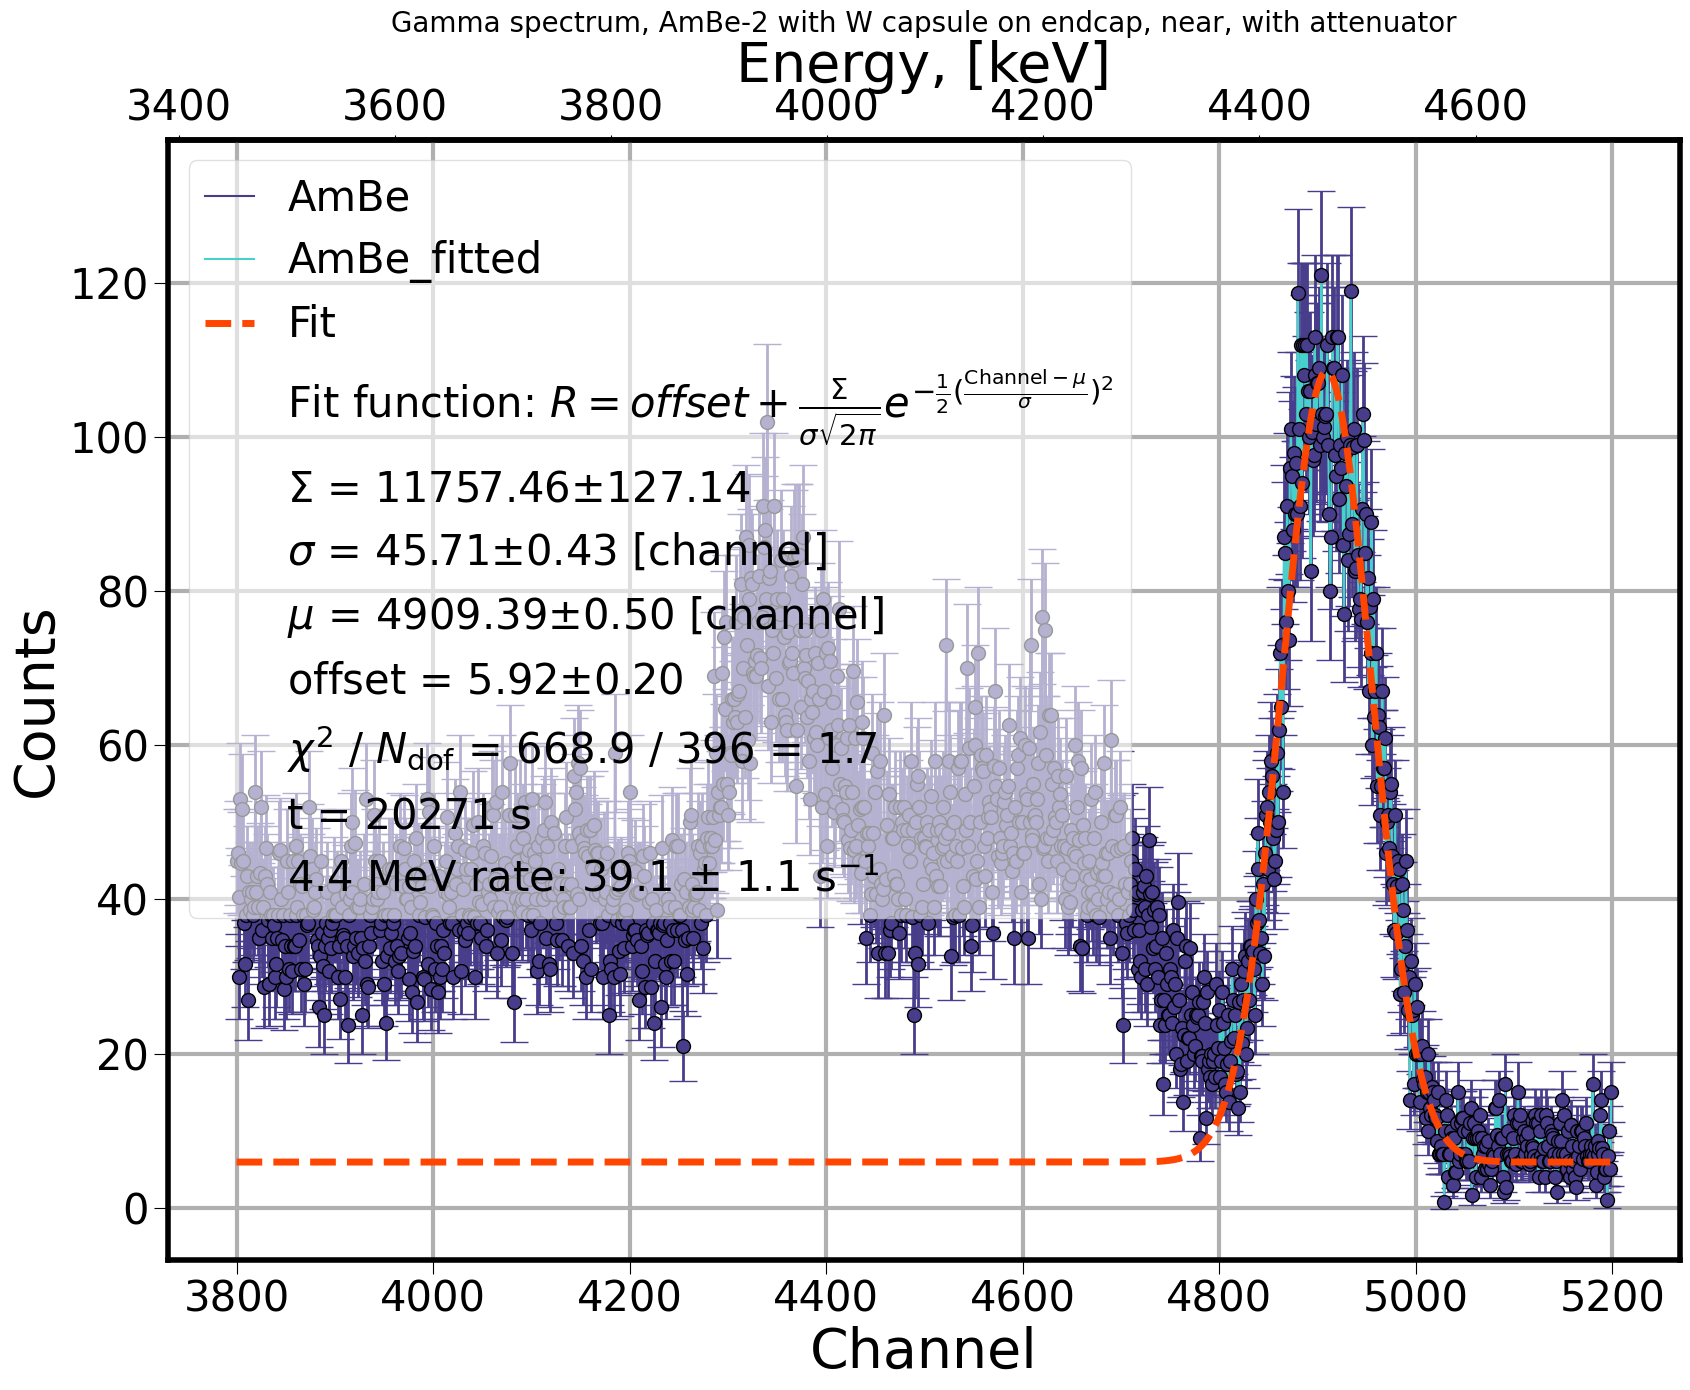

In [14]:
#define variables for the order of plotting
analysis_extra_kwargs = {"zorder":200}
analysis_kwargs = {"zorder":100}
level_kwargs = {"zorder":80}
data_kwargs = {"zorder":50}
error_kwargs = {"zorder":25}
grid_kwargs = {"zorder":0}

#plotting parameters
label_size = 14
plt.rcParams['xtick.labelsize'] = label_size
plt.rcParams['ytick.labelsize'] = label_size
plt.rcParams['figure.figsize'] = (17.0, 14.0)
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['grid.linewidth'] = 3
matplotlib.rcParams['legend.handlelength'] = 0
matplotlib.rcParams['legend.numpoints'] = 1

plt.rcParams['legend.handlelength'] = 1.17
plt.rcParams['legend.handleheight'] = 0.65


#define fit function for average pulse
from scipy.integrate import quad
from decimal import Decimal

from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerLine2D

import iminuit


import scipy
from scipy.signal import find_peaks, peak_widths,hilbert
    
# allow complete fit output information  to be displayed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares


# Define function and its inverse
f = lambda x: (x-p0)/p1
g = lambda x: p1*x+p0

plt.figure()
fig, ax1 = plt.subplots()
ax2 = ax1.secondary_xaxis("top", functions=(f,g))

plt.title('Gamma spectrum, AmBe-2 with W capsule on endcap, near, with attenuator', fontsize=20)




#label the axes
ax1.set_xlabel( "Channel", fontsize=40)
ax1.set_ylabel( u"Counts", fontsize=40)

#set axes tick parameters
for tl in ax1.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)
    


for tl in ax1.get_yticklabels():
    tl.set_color('black')
    tl.set_size(30)
    
ax2.set_xlabel( "Energy, [keV]", fontsize=40)

for tl in ax2.get_xticklabels():
    tl.set_color('black')
    tl.set_size(30)  

    
ax1.tick_params(length=10)

fig.tight_layout()









channels=np.asarray(scan[0][0][3800:5200])
rate_no_bkg=np.asarray(scan[0][1])[3800:5200]-np.asarray(bkg[3800:5200])/t_bkg*t
rate_no_bkg_err=np.sqrt(np.asarray(scan[0][1])[3800:5200]-np.asarray(bkg[3800:5200])/t_bkg*t)

channels_to_fit=np.asarray(scan[0][0][4800:5200])
rate_no_bkg_to_fit=np.asarray(scan[0][1])[4800:5200]-np.asarray(bkg[4800:5200])/t_bkg*t
rate_no_bkg_err_to_fit=np.sqrt(np.asarray(scan[0][1])[4800:5200]-np.asarray(bkg[4800:5200])/t_bkg*t)



handlelist=[]
labellist=[]


Data, = ax1.plot(channels, rate_no_bkg, 
                          color="darkslateblue", label="AmBe",  **error_kwargs)

data_err = plt.errorbar(channels, rate_no_bkg, yerr=np.array(rate_no_bkg_err), fmt='o', mec='black', 
                            mew=1, color = 'darkslateblue', markersize=1, elinewidth=2, capthick=10, capsize=10, **error_kwargs)

data = ax1.scatter(channels, rate_no_bkg, label=r'Data', edgecolors='black', 
                              marker="o", color="darkslateblue", s=100, **analysis_kwargs)


handlelist.append(Data)
labellist.append(Data.get_label())







#define fit function
def normal_distribution(x, A, sig, mu, offset):
    return offset+A/np.sqrt(2*math.pi)/sig * np.exp(-1/2*((x-mu)/sig)**2)





#perform a least squares fit with iminuit
least_squares = LeastSquares(channels_to_fit, rate_no_bkg_to_fit, rate_no_bkg_err_to_fit,normal_distribution)





#set initial parameter values
A00 = 10000
mu00 = 4900
sig00 = 45 
offset00 = 6

#assemble list fit arguments for the minimizer
namelist = ['A', 'sig', 'mu','offset']
kwargs = dict(A=A00, sig=sig00, mu=mu00, offset=offset00)


#create iminuit minimizer
minuit = iminuit.Minuit(least_squares, **kwargs, name=namelist ) 
    
    
#set parameter limits
#minuit.limits["bkg"] = (-2e-2,0)



#run minimization  
minuit.migrad()
#minuit.minos()# run uncertainty estimator
#minuit.hesse()# run uncertainty estimator

#print fit results
print(minuit.values)
print(minuit.errors)
# see iminuit tutorial on how to give initial value/range/error

#create tuple of fit parameter result values, to pass to the fit function
argtuple=tuple(minuit.values)
#argtuple=tuple(minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset'])

print(argtuple)



#plot the fit curve
fit=[]
ch = []
chmin=channels[0]
chmax=channels[len(channels)-1]
k=chmin
k_end=chmax

while k<=k_end:
    ch.append(k)
    #fit.append(normal_distribution(t, *argtuple))
    fit.append(normal_distribution(k, minuit.values['A'], minuit.values['sig'], minuit.values['mu'], minuit.values['offset']))
    k+=0.1

Data_fit, = ax1.plot(channels_to_fit, rate_no_bkg_to_fit, 
                          color="mediumturquoise", label="AmBe_fitted",  **error_kwargs)

handlelist.append(Data_fit)
labellist.append(Data_fit.get_label())

Fit, = plt.plot(np.asarray(ch), np.asarray(fit), c='orangered', 
                           linewidth=5, linestyle='dashed', label = 'Fit', **analysis_extra_kwargs)


handlelist.append(Fit)
labellist.append(Fit.get_label())
    
text10= 'Fit function: ' + r'$I_{\mathrm{FC}}(B) = bkg + \sum _{i}\frac{A_i}{\sigma _i \sqrt{2 \pi} } e^{-\frac{1}{2} (\frac{B-B^\mathrm{central}_i}{\sigma _i})^2}$'


text_chi_1 = f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {len(rate_no_bkg) - minuit.nfit} = {minuit.fval / (len(rate_no_bkg) - minuit.nfit) :.1f}"


extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    





#short legend
leg = plt.legend(handles=[Data, Fit, extra, extra], 
                 labels = [Data.get_label(), Fit.get_label(), text10, text_chi_1],
                 prop={'size': 30}, loc = 'upper left', fancybox=True, framealpha=0.6)
leg.set_zorder(300)




extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)

text=[r'Fit function: ' + r'$R = offset + \frac{\Sigma}{\sigma \sqrt{2 \pi} } e^{-\frac{1}{2} (\frac{\mathrm{Channel}-\mu}{\sigma })^2}$',
      r'$\Sigma$'+' = {}$\pm${}'.format(round(Decimal(minuit.values['A']),number_sigdigs(minuit.errors['A'])), 
                                        round(Decimal(minuit.errors['A']),number_sigdigs(minuit.errors['A']))),
      r'$\sigma$'+' = {}$\pm${} [channel]'.format(round(Decimal(minuit.values['sig']),number_sigdigs(minuit.errors['sig'])), 
                                        round(Decimal(minuit.errors['sig']),number_sigdigs(minuit.errors['sig']))),
      r'$\mu$'+' = {}$\pm${} [channel]'.format(round(Decimal(minuit.values['mu']),number_sigdigs(minuit.errors['mu'])), 
                                        round(Decimal(minuit.errors['mu']),number_sigdigs(minuit.errors['mu']))),
      r'offset'+' = {}$\pm${}'.format(round(Decimal(minuit.values['offset']),number_sigdigs(minuit.errors['offset'])), 
                                        round(Decimal(minuit.errors['offset']),number_sigdigs(minuit.errors['offset']))),
      f"$\\chi^2$ / $N_\\mathrm{{dof}}$ = {minuit.fval:.1f} / {len(rate_no_bkg_to_fit) - minuit.nfit} = {minuit.fval / (len(rate_no_bkg_to_fit) - minuit.nfit) :.1f}",
      r't'+' = {} s'.format(t),


     ]



for string in text:
    handlelist.append(extra)
    labellist.append(string)



efficiency=0.01484 #sigma corrected
efficiency_err=0.00039 #sigma corrected



rate=minuit.values['A']/t/efficiency

rate_err = sqrt((minuit.errors['A']/t/efficiency)**2+(minuit.values['A']*efficiency_err
/t/efficiency**2)**2) #sqrt(np.sum(counts_no_bkg_to_fit))/t/0.00097




handlelist.append(extra)
labellist.append("4.4 MeV rate: {} $\pm$ {}".format(round(Decimal(rate),1), round(Decimal(rate_err),1)) + " s$^{-1}$")
                 







fig.tight_layout()



ax1.grid() # add grid to the plot

#short legend
leg = plt.legend(handles=handlelist, 
                 labels = labellist,
                 prop={'size': 30}, loc = 'upper left', fancybox=True, framealpha=0.6)
leg.set_zorder(300)
#save and show the plot
plt.savefig(measurement_output_path+"Gamma_spectrum_vs_bkg_AmBe-2_withW_withAt_ADC-Ch_fit_4400keV-photopeak_counts.png", bbox_inches ='tight')
plt.show()
